<center><h1><u></u>$\color{#454775}{\bf \underline {Analyzing\;Marketing\;Campaigns}}$</u></h1></center><br>


## $\color{#454775}{\bf Importing\;Liberaries}$

In [502]:
# Main Liberaries: 
#=================#

import pandas as pd 
import numpy as np
import math
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.patheffects as path_effects
import seaborn as sns

# Importing the file contains all the needed functions:
#======================================================#

import automation as f
from importlib import reload
reload(f)

<module 'automation' from 'C:\\Users\\hp\\Analyzing_Marketing_Campaigns\\automation.py'>

<br>

## $\color{#454775}{\bf The\;Dataset}$

In [503]:
#Loading The Marketing Dataset
#============================#

marketing = pd.read_csv('marketing.csv')

marketing.head()

user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN           House Ads        True  
2           NaN           House Ads        True  
3           NaN           House Ads        True  
4           NaN           House Ads        True

<br>

## $\color{#454775}{\bf Data\;Assessing}$
### $\color{#454775}{\sf 1-\;Data\;Types\;and\;Null\;Values:}$

In [504]:
# Examining data types & null values: 
#===================================#

marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


<br>

### $\color{#454775}{\sf 2-\;Dataset\;Description:}$

In [505]:
# Dataset Description:
#====================#

print(f'- The Marketing Dataset consists of {marketing.shape[0]} Rows and {marketing.shape[1]} Columns')

print (f'\n- The dataset consists of {marketing.user_id.nunique()} user.\n')

print ('- The Data Selection:', f.dates(marketing,'date_served'))
print ('- The Subscription Dates:', f.dates(marketing,'date_subscribed'))
print ('- The Subscription Cancellation occured within:', f.dates(marketing, 'date_canceled')) 

print('- The Marketing Channels are as follows:\n', f.col_uniques(marketing, 'marketing_channel'))
print('\n- The Variant categories are as follows:\n', f.col_uniques(marketing, 'variant'))
print('\n- The Converted column is classified into:\n', f.col_uniques(marketing, 'converted'))
print('\n- The Displayed Languages are as follows:\n', f.col_uniques(marketing, 'language_displayed'))
print('\n- The Preferred Languages are as follows:\n', f.col_uniques(marketing, 'language_preferred'))
print('\n- The Age Groups are classified as follows:\n', f.col_uniques(marketing, 'age_group'))
print('\n- The Subscribing Channels are as follows:\n', f.col_uniques(marketing, 'subscribing_channel'))
print('\n- The is_retained column is classified into:\n', f.col_uniques(marketing, 'is_retained'))

- The Marketing Dataset consists of 10037 Rows and 12 Columns

- The dataset consists of 7309 user.

- The Data Selection: 
    Start : 2018-01-01 
    End   : 2018-01-31

- The Subscription Dates: 
    Start : 2018-01-01 
    End   : 2018-01-31

- The Subscription Cancellation occured within: 
    Start : 2018-01-05 
    End   : 2018-05-09

- The Marketing Channels are as follows:
   1 - House Ads
   2 - Push
   3 - Facebook
   4 - Instagram
   5 - Email
   6 - nan

- The Variant categories are as follows:
   1 - personalization
   2 - control

- The Converted column is classified into:
   1 - True
   2 - False
   3 - nan

- The Displayed Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Preferred Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Age Groups are classified as follows:
   1 - 0-18 years
   2 - 19-24 years
   3 - 24-30 years
   4 - 30-36 years
   5 - 36-45 years
   6 - 45-55 years
   7 - 55

<br>

### $\color{#454775}{\sf 3-\;Summary\;Statistics:}$

In [506]:
# Summary Statistics
#==================#

marketing.describe()

user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 600        1279

<br>

### $\color{#454775}{\sf 4-\;Duplicated\;Values:}$

In [507]:
# Checking for duplicates: 
#========================#

print(f.duplicates(marketing))


- The Dataset has 37 Duplicated rows and their indexes are as follows:
 
"470, 478, 894, 895, 954, 955, 1004, 1005, 1027, 1047, 1051, 3022, 3166, 3196, 3198, 3310, 3498, 3642, 3801, 3803, 4083, 4124, 4129, 4134, 6880, 7440, 7488, 8452, 8454, 8456, 8458, 8486, 8488, 8500, 8502, 8504, 8506"



<br>

### $\color{#454775}{\sf 5-\;Missing\;Values:}$

In [508]:
# Checking for Missing Values: 
#============================#

print(f.missing(marketing))

marketing.isna().sum().reset_index().rename(columns = {'index': 'Column_Name', 0: 'NULLs_Count'}).style.hide()

The Dataset has 34049 NULL Values that are distributed as follows: 


>$\color{#454775}{Note}:$<br>
> ***date_subscribed, date_canceled, subscribing_channel, & is_retained:***
>- _These values are naturally missing depending on whether the user subscribed or not._
>- _Some exceptions may arise that would require a precautionary measure to make sure that the data values are consistent with each other._
>- _**For Example,** A handling step to make sure that if a user converted, the subscription information must be addressed as well._

In [509]:
# Detemining the indexes of the null values for:
#==============================================#

# 1- date_served
print(f.missing_indexs(marketing, 'date_served'))

# 2- marketing_channel
print(f.missing_indexs(marketing, 'marketing_channel'))

# 3- converted
print(f.missing_indexs(marketing, 'converted'))


- The "date_served" Column has 16 NULL Values and their Indexes are as follows:
 
"7038, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The "marketing_channel" Column has 15 NULL Values and their Indexes are as follows:
 
"9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The "converted" Column has 15 NULL Values and their Indexes are as follows:
 
"9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"



>$\color{#454775}{Note}:$<br>
> ***date_served, marketing_channel, & converted columns:*** <br>
>      _The three columns share the same missing rows (except for date_served index 7038 )_<br><br>


<br>

### $\color{#454775}{\sf 5-\;User\;Behavior:}$

In [510]:
# Counting users' frequency:
#=========================#

user_freq = marketing.user_id.value_counts().reset_index()

user_freq.columns = ['user_id', 'frequency']

user_freq.sort_values('frequency', ascending = False).head()

user_id  frequency
0   a100000882         12
10  a100000886         10
1   a100000892         10
17  a100000894         10
16  a100000893         10

In [511]:
# Calculating the number of users based on their frequency
#=========================================================#

user_freq.groupby('frequency').user_id.count().reset_index()\
         .rename(columns = {'frequency': 'user_engagement', 'user_id': 'num_users'}).sort_values('user_engagement', ascending=False)

user_engagement  num_users
7               12          1
6               10         17
5                8          2
4                5         13
3                4         62
2                3        126
1                2       2060
0                1       5028

In [512]:
# Assessing the user_id with 12 engagements:
#==========================================#

user_freq.query('frequency == 12')

user_id  frequency
0  a100000882         12

In [513]:
# Assessing the user_id with 12 engagements (user_id: a100000882):
marketing.query('user_id == "a100000882"')

user_id date_served marketing_channel          variant converted  \
874  a100000882     1/14/18         Instagram  personalization      True   
875  a100000882     1/14/18         Instagram  personalization      True   
876  a100000882     1/18/18         Instagram          control      True   
877  a100000882     1/18/18         Instagram          control      True   
878  a100000882      1/1/18         House Ads          control     False   
879  a100000882      1/1/18         House Ads          control     False   
880  a100000882      1/2/18         House Ads  personalization     False   
881  a100000882      1/2/18         House Ads  personalization     False   
882  a100000882      1/3/18         House Ads  personalization     False   
883  a100000882      1/3/18         House Ads  personalization     False   
884  a100000882      1/2/18         House Ads          control     False   
885  a100000882      1/2/18         House Ads          control     False   

    language_displayed language_preferred    age_group date_subscribed  \
874            English            English  45-55 years         1/14/18   
875            English            English  45-55 years         1/18/18   
876            English            English  45-55 years         1/14/18   
877            English            English  45-55 years         1/18/18   
878            English            English  45-55 years         1/14/18   
879            English            English  45-55 years         1/18/18   
880            English            English  45-55 years         1/14/18   
881            English            English  45-55 years         1/18/18   
882            English            English  45-55 years         1/14/18   
883            English            English  45-55 years         1/18/18   
884            English            English  45-55 years         1/14/18   
885            English            English  45-55 years         1/18/18   

    date_canceled subscribing_channel is_retained  
874           NaN           Instagram        True  
875           NaN           Instagram        True  
876           NaN           Instagram        True  
877           NaN           Instagram        True  
878           NaN           Instagram        True  
879           NaN           Instagram        True  
880           NaN           Instagram        True  
881           NaN           Instagram        True  
882           NaN           Instagram        True  
883           NaN           Instagram        True  
884           NaN           Instagram        True  
885           NaN           Instagram        True

In [514]:
# user_id with 10 engagements:
#============================#

user_freq.query('frequency == 10').head()

user_id  frequency
1  a100000892         10
2  a100000884         10
3  a100000877         10
4  a100000878         10
5  a100000879         10

In [515]:
# Assessing the a user_id with 10 engagements (user_id: a100000878):
marketing.query('user_id == "a100000878"')

user_id date_served marketing_channel          variant converted  \
834  a100000878     1/10/18             Email          control      True   
835  a100000878     1/10/18             Email          control      True   
836  a100000878     1/14/18             Email          control      True   
837  a100000878     1/14/18             Email          control      True   
838  a100000878      1/2/18         House Ads          control     False   
839  a100000878      1/2/18         House Ads          control     False   
840  a100000878      1/3/18         House Ads  personalization     False   
841  a100000878      1/3/18         House Ads  personalization     False   
842  a100000878      1/3/18         House Ads          control     False   
843  a100000878      1/3/18         House Ads          control     False   

    language_displayed language_preferred    age_group date_subscribed  \
834            English            English  19-24 years         1/10/18   
835            English            English  19-24 years         1/14/18   
836            English            English  19-24 years         1/10/18   
837            English            English  19-24 years         1/14/18   
838            English            English  19-24 years         1/10/18   
839            English            English  19-24 years         1/14/18   
840            English            English  19-24 years         1/10/18   
841            English            English  19-24 years         1/14/18   
842            English            English  19-24 years         1/10/18   
843            English            English  19-24 years         1/14/18   

    date_canceled subscribing_channel is_retained  
834           NaN               Email        True  
835           NaN               Email        True  
836           NaN               Email        True  
837           NaN               Email        True  
838           NaN               Email        True  
839           NaN               Email        True  
840           NaN               Email        True  
841           NaN               Email        True  
842           NaN               Email        True  
843           NaN               Email        True

In [516]:
# user_id with 8 engagements:
#===========================#

user_freq.query('frequency == 8')

user_id  frequency
18  a100000875          8
19  a100000876          8

In [517]:
# Assessing the a user_id with 8 engagements:
marketing.query('user_id == "a100000875"')

user_id date_served marketing_channel          variant converted  \
808  a100000875      1/7/18         Instagram  personalization      True   
809  a100000875      1/7/18         Instagram  personalization      True   
810  a100000875     1/11/18         Instagram          control      True   
811  a100000875     1/11/18         Instagram          control      True   
812  a100000875      1/2/18         House Ads  personalization     False   
813  a100000875      1/2/18         House Ads  personalization     False   
814  a100000875      1/3/18         House Ads          control     False   
815  a100000875      1/3/18         House Ads          control     False   

    language_displayed language_preferred    age_group date_subscribed  \
808            English            English  19-24 years          1/7/18   
809            English            English  19-24 years         1/11/18   
810            English            English  45-55 years          1/7/18   
811            English            English  45-55 years         1/11/18   
812            English            English  19-24 years          1/7/18   
813            English            English  19-24 years         1/11/18   
814            English            English  45-55 years          1/7/18   
815            English            English  45-55 years         1/11/18   

    date_canceled subscribing_channel is_retained  
808       3/28/18           Instagram       False  
809           NaN           Instagram        True  
810       3/28/18           Instagram       False  
811           NaN           Instagram        True  
812       3/28/18           Instagram       False  
813           NaN           Instagram        True  
814       3/28/18           Instagram       False  
815           NaN           Instagram        True

In [518]:
# user_id with 5 engagements:
#===========================#

user_freq.query('frequency == 5').head()

user_id  frequency
20  a100002370          5
21  a100000858          5
22  a100002368          5
23  a100002369          5
24  a100000857          5

In [519]:
# Assessing the a user_id with 5 engagements:
marketing.query('user_id == "a100002369"')

user_id date_served marketing_channel  variant converted  \
4125  a100002369     1/23/18         House Ads  control     False   
4126  a100002369     1/25/18         Instagram  control     False   
4127  a100002369     1/20/18          Facebook  control     False   
4128  a100002369     1/20/18         Instagram  control     False   
4129  a100002369     1/20/18          Facebook  control     False   

     language_displayed language_preferred    age_group date_subscribed  \
4125            English            English  36-45 years             NaN   
4126            English            English  36-45 years             NaN   
4127            English            English  36-45 years             NaN   
4128            English            English  36-45 years             NaN   
4129            English            English  36-45 years             NaN   

     date_canceled subscribing_channel is_retained  
4125           NaN                 NaN         NaN  
4126           NaN                 NaN         NaN  
4127           NaN                 NaN         NaN  
4128           NaN                 NaN         NaN  
4129           NaN                 NaN         NaN

In [520]:
# Assessing if any of users (who saw the ad 5 times) converted:
marketing[marketing['user_id'].isin(user_freq.query('frequency == 5').user_id.to_list())].query('converted == True')

user_id date_served marketing_channel          variant converted  \
739  a100000857     1/28/18             Email          control      True   
744  a100000858     1/29/18              Push  personalization      True   
749  a100000859     1/30/18          Facebook  personalization      True   
754  a100000860     1/23/18         Instagram  personalization      True   
759  a100000861     1/24/18         Instagram  personalization      True   
764  a100000862     1/25/18         Instagram  personalization      True   
769  a100000863     1/26/18         Instagram  personalization      True   
774  a100000864     1/27/18         Instagram  personalization      True   

    language_displayed language_preferred    age_group date_subscribed  \
739            English            English  24-30 years         1/28/18   
744            English            English   0-18 years         1/29/18   
749            English            English  19-24 years         1/30/18   
754            English            English  24-30 years         1/23/18   
759            English            English    55+ years         1/24/18   
764            English            English  19-24 years         1/25/18   
769            English            English  24-30 years         1/26/18   
774            English            English  30-36 years         1/27/18   

    date_canceled subscribing_channel is_retained  
739           NaN               Email        True  
744           NaN                Push        True  
749           NaN            Facebook        True  
754           NaN           Instagram        True  
759           NaN           Instagram        True  
764           NaN           Instagram        True  
769           NaN           Instagram        True  
774           NaN           Instagram        True

>$\color{#454775}{Notes:}$
> - ***Users may be exposed to the same ad multiple times, with engagement frequencies ranging from 1 to 12 occurrences.*** <br><br>
> - ***After reviewing a sample of user engagements:*** <br><br>
>   - ***A near-duplicated pattern was noticed for users' multiple exposures*** <br><br>
>   - _**One user (ID: a100000882) exhibited 12 ad exposures:**_
>     - _Within these 12 records, several entries appeared repeated, with some columns identical while others showed slight variations._
>     - _*For instance,* this user converted in 4 records — two under the personalized variant (served on January 14) and two under the control variant (served on January 18). The subscription dates associated with these conversions were either January 14 or January 18, suggesting minor inconsistencies or multiple conversions logged for the same user within a short period._ <br><br>
>   - _**A similar pattern was observed for another sample user with 10 ad exposures (ID: a100000878):**_
>     - _The user interacted primarily through House Ads and Email channels._
>     - _Multiple records showed identical values across most columns, with slight variations in date_served and date_subscribed._
>     - _The user converted multiple times on the same channel (Email, control variant) — an unusual pattern since a user typically subscribes only once._
>     - _These repeated or inconsistent entries suggest potential data duplication or logging issues, where multiple impressions and conversions might have been recorded for a single actual event._ <br><br>
>   - ***For a user with 8 recorded engagements (User ID: a100000875), several inconsistencies were observed:***
>     - _Despite being recorded as the same user, their age group alternated between 19–24 years and 45–55 years, indicating a data entry or merge error._
>     - _The user converted four times. Subscription dates (1/7/18 and 1/11/18) were reused across records, often paired with inconsistent cancellation statuses._
>     - _Some records show the user as retained, while others mark them as canceled, even within the same channel and week._
>     - _This record highlights duplicated and conflicting user engagement logs, likely resulting from data integration or tracking issues._ <br><br>
>   - ***Out of the 13 users who saw the ad 5 times, only 8 converted.***

<br>

## $\color{#454775}{\bf Data\;Cleaning}$
### $\color{#454775}{\sf 1-\;Removing\;Duplicates:}$
$\color{#454775}{a)}$ Remove Exact Duplicates (37 duplicated raws)<br>
$\color{#454775}{b)}$ Remove Near-Duplicates to ensures each user’s engagement on a given day with a specific ad type is counted only once.

In [521]:
# 1- Remove exact duplicates:
#===========================#

marketing.drop_duplicates(inplace = True)

# Checking: 
print(f.duplicates(marketing))

The Dataset has no Duplicated Values with 10000 Row


In [522]:
# 2- Remove near-duplicate records: 
#=================================#

subsets= ['user_id', 'date_served',	'marketing_channel', 'variant', 'converted', 'age_group']

marketing.drop_duplicates(subset = subsets, inplace = True, keep = 'first')

In [523]:
# Checking:
marketing.describe()

user_id date_served marketing_channel  variant converted  \
count         9903        9887              9888     9903      9888   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq             6         784              4655     5009      8853   

       language_displayed language_preferred    age_group date_subscribed  \
count                9903               9903         9903            1749   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9661               9147         1654             157   

       date_canceled subscribing_channel is_retained  
count            575                1749        1749  
unique           115                   5           2  
top           4/1/18           Instagram        True  
freq              14                 541        1174

<br>

### $\color{#454775}{\sf2-\;Changing\;Dates\;Data\;Types:}$
$\color{#454775}{a)}$ ***date_served:*** _str_ to _date_ <br>
$\color{#454775}{b)}$ ***date_subscribed:*** _str_ to _date_ <br>
$\color{#454775}{c)}$ ***date_canceled:*** _str_ to _date_ <br>


In [524]:
# Changing the dates data types:
#==============================#

f.date_change(marketing, 'date_served', 'date_subscribed', 'date_canceled')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9903 entries, 0 to 10036
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_served      9887 non-null   datetime64[ns]
 1   date_subscribed  1749 non-null   datetime64[ns]
 2   date_canceled    575 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 309.5 KB


<br>

### $\color{#454775}{\sf3-\;Standardize\;Subscription\;Dates:}$
To ensure logical and consistent relationships between engagement and subscription dates, the following adjustments were applied: <br>
##### $\color{#454775}{a)}$ ***For converted users:*** 
- ***Issue:*** Some records show _date_subscribed_ earlier than _date_served_. However, a user cannot subscribe before seeing the ad.
- ***Action:*** When _converted = True_ and _date_subscribed < date_served_, replace _date_subscribed_ with _date_served_.
#### $\color{#454775}{b)}$ ***For not-converted users:*** 
- ***Issue:*** Some users who were exposed to multiple ads have a _date_subscribed_ value recorded even when _converted = False_. This creates inconsistencies since non-converted records should not have a valid subscription date.
- ***Action:*** Set _date_subscribed_ to _NaN_ for all non-converted users to remove this confusion.

In [525]:
# Standardize Subscription dates (Converted Users): 
#==================================================#

marketing['date_subscribed'] = np.where(np.logical_and(marketing.converted == True, marketing.date_subscribed < marketing.date_served), 
                                        marketing['date_served'], marketing['date_subscribed'])


# Standardize Subscription dates (Non-Converted Users):
#======================================================#

marketing['date_subscribed'] = np.where(np.logical_and(marketing['converted'] == False, marketing.date_subscribed.isna() == False),
                                        pd.NaT, marketing['date_subscribed'])

# Changing the data type of date_subscribed
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])

#Checking: 
marketing.query("(converted == False & date_subscribed.notnull()) | (converted == True & date_subscribed < date_served)")

Empty DataFrame
Columns: [user_id, date_served, marketing_channel, variant, converted, language_displayed, language_preferred, age_group, date_subscribed, date_canceled, subscribing_channel, is_retained]
Index: []

<br> 

### $\color{#454775}{\sf 4-\;Handling\;Nulls:}$
##### ***$\color{#454775}{a)}$ Shared nulls across date_served (except for index 7038), marketing_channel, converted:*** 
Since those columns share the same missing rows, dropping them together avoids keeping incomplete entries that would otherwise distort the analysis.<br>
##### ***$\color{#454775}{b)}$ date_served (index 7038):*** 
Since this is an isolated null in the middle of the dataset, forward-filling (ffill) after sorting by date is a reasonable strategy.<br>
##### ***$\color{#454775}{c)}$ date_subscribed:***
1. ***As a Precautionary measure,*** if the user converted,the missing values (if any) would be replaced with **date_served**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>
##### ***$\color{#454775}{d)}$ date_canceled:*** 
There is no need to handle its missing values in as these values are naturally missing depending on whether the user canceled his subscription or not. Filling them would introduce bias.<br>
##### ***$\color{#454775}{e)}$ subscribing_channel*** 
1. ***As a Precautionary measure,***
   - If the user converted,the missing values (if any) would be replaced with **marketing_channel**
   - If the user didn't convert & the subscribed channel isn't empty,then these values should be replaced with **NaN**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not .<br>
##### ***$\color{#454775}{f)}$ is_retained:*** 
1. ***As a Precautionary measure,***
   - If the user converted and there is no mention for canceling the subscription ,the missing values (if any) would be replaced with **True**.
   - If the user didn't convert & the is_retained value isn't empty,then these values should be replaced with **False**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>

In [526]:
# Dropping Shared nulls across date_served (except for index 7038), marketing_channel, converted: 
#===============================================================================================#

marketing.dropna(subset = 'marketing_channel', inplace = True)

In [527]:
# Nulls at date_served column:
print(f'''
The date_served column has {marketing.date_served.isna().sum()} null value and its index is {", ".join(map(str, marketing[marketing.date_served.isna() == True].index.to_list()))}\n''')


The date_served column has 1 null value and its index is 7038



In [528]:
# date_served (index 7038):
#=========================#

# Sorting the table by date served
marketing = marketing.sort_values('date_served') 

# Replacing null by forward fill method 
marketing.date_served.fillna(method = 'ffill', inplace = True)

# Checking:
if marketing.date_served.isna().sum() == 0: 
    print(f'\nThe Null values in date_served Column has been handeled, resulting in a {marketing.date_served.isna().sum()} Null Value for this column\n')
else: 
    print(f'''The date_served Column has {marketing.date_served.isna().sum()} NULL Values ''')


The Null values in date_served Column has been handeled, resulting in a 0 Null Value for this column



In [529]:
# date_subscribed:
#================#

marketing['date_subscribed'] = np.where(np.logical_and(marketing.converted == True,marketing.date_subscribed.isna() == True),
                                        marketing.date_served, marketing.date_subscribed)

In [530]:
# subscribing_channel:
#=====================#

marketing['subscribing_channel'] = np.where(np.logical_and(marketing.converted == True, marketing.subscribing_channel.isna() == True),
                                            marketing.marketing_channel, marketing.subscribing_channel)

marketing['subscribing_channel'] = np.where(np.logical_and(marketing.converted == False, marketing.subscribing_channel.isna() == False),
                                            np.nan, marketing.subscribing_channel)

In [531]:
#is_retained:
#============#

marketing['is_retained'] = np.where(
                            np.logical_and(marketing.converted == True, marketing.is_retained.isna() == True, marketing.date_canceled.isna() ==True),
                            True, marketing.is_retained)

marketing['is_retained'] = np.where(marketing.converted == False, np.nan, marketing.is_retained)

In [532]:
# Checking for Null Values:
print(f.missing(marketing))

marketing.isna().sum().reset_index().rename(columns = {'index': 'Column_Name', 0: 'NULLs_Count'}).style.hide()

The Dataset has 35872 NULL Values that are distributed as follows: 


<br>

### $\color{#454775}{\sf 5-\;Handeling\;converted\;column:}$
 ***$\color{#454775}{-}$ Changing Data Type:***  _str_ to _boolean_

In [533]:
# Changing the data type of converted: 
#====================================#

marketing['converted'] = marketing['converted'].astype('bool')

marketing['converted'].dtype

dtype('bool')

<br>

### $\color{#454775}{\sf 6-\;Adjusting\;user\;id\;column:}$
Due to the inconsistences in some records, where a user may have more than one age group, it would be better to adjust the user name column by adding the first 2 charcters of age group values to the user id

In [534]:
marketing['user_id'] = [f'{x}-{y.split(" ")[0]}' for x, y in zip(marketing['user_id'], marketing['age_group'])]

marketing.head()

user_id date_served marketing_channel          variant  \
0      a100000029-0-18  2018-01-01         House Ads  personalization   
6678  a100004324-30-36  2018-01-01         House Ads  personalization   
6676  a100004323-24-30  2018-01-01         House Ads  personalization   
6674  a100004322-19-24  2018-01-01         House Ads  personalization   
6672   a100004321-0-18  2018-01-01         House Ads  personalization   

      converted language_displayed language_preferred    age_group  \
0          True            English            English   0-18 years   
6678      False            English            English  30-36 years   
6676      False            English            English  24-30 years   
6674      False            English            English  19-24 years   
6672      False             German             German   0-18 years   

     date_subscribed date_canceled subscribing_channel is_retained  
0         2018-01-01           NaT           House Ads        True  
6678             NaT           NaT                 NaN         NaN  
6676             NaT           NaT                 NaN         NaN  
6674             NaT           NaT                 NaN         NaN  
6672             NaT           NaT                 NaN         NaN

In [535]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9888 entries, 0 to 7038
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              9888 non-null   object        
 1   date_served          9888 non-null   datetime64[ns]
 2   marketing_channel    9888 non-null   object        
 3   variant              9888 non-null   object        
 4   converted            9888 non-null   bool          
 5   language_displayed   9888 non-null   object        
 6   language_preferred   9888 non-null   object        
 7   age_group            9888 non-null   object        
 8   date_subscribed      1035 non-null   datetime64[ns]
 9   date_canceled        575 non-null    datetime64[ns]
 10  subscribing_channel  1035 non-null   object        
 11  is_retained          1035 non-null   object        
dtypes: bool(1), datetime64[ns](3), object(8)
memory usage: 936.7+ KB


<br>

### $\color{#454775}{\sf 7-\;Adding\;New\;Columns:}$
- ***is_house_ad:*** Identifies if a particular marketing asset was a house ad or not _(since it is the most frequent value in this column "4733 out of 10000")._
- ***matched_lang:*** conveys whether the ad was shown to the user in their preferred language.
- ***dow:*** service Days starting from Monday till Sunday, t measure the most frequent days.
- ***ad_repeated:*** to check whether the user saw the ad multiple times or once.

In [536]:
# Adding the is_house_ad Column:
#==============================#

marketing['is_house_ad']=[True if x == "House Ads" 
                          else False for x in marketing.marketing_channel]

marketing.loc[:, ['marketing_channel', 'is_house_ad']].sample(5)

marketing_channel  is_house_ad
1329              Push        False
6599         Instagram        False
3955         Instagram        False
9604         House Ads         True
3556         House Ads         True

In [537]:
# Adding status Column:
#====================#

marketing['status'] = np.where(marketing['language_displayed'] == marketing['language_preferred'], 'matched_language', 'mismatched_language')

marketing.loc[:,['language_displayed', 'language_preferred', 'status']].sample(5)

language_displayed language_preferred            status
8916            English            English  matched_language
3627            English            English  matched_language
2497            English            English  matched_language
7493            English            English  matched_language
46              English            English  matched_language

In [538]:
# Adding dow column: 
#==================#

marketing['dow'] = ['1_Mo' if x == 0
               else '2_Tu' if x == 1
               else '3_We' if x == 2
               else '4_Th' if x == 3
               else '5_Fr' if x == 4
               else '6_Sa' if x == 5
               else '7_Su'
                    for x in marketing.date_served.dt.dayofweek]

marketing.loc[:, ['date_served', 'dow']].sample(5)

date_served   dow
4737  2018-01-04  4_Th
3655  2018-01-21  7_Su
8207  2018-01-12  5_Fr
9664  2018-01-29  1_Mo
8877  2018-01-17  3_We

In [539]:
# Adding ad_repeated column: 
#===========================#

is_repeated_user = marketing.user_id.value_counts() > 1

repeated = is_repeated_user.reset_index().rename(columns = {'index': 'user_id', 'user_id': 'repeated'})\
                           .query('repeated == True').user_id.to_list()


marketing['ad_exposure'] = ['Multi-Exposure' if x in repeated else 'Single-Exposure' for x in marketing.user_id]

marketing.loc[:, ['user_id', 'ad_exposure']].sample(5)

user_id      ad_exposure
7786   a100005000-0-18  Single-Exposure
1081  a100000968-19-24  Single-Exposure
9096   a100006393-0-18  Single-Exposure
9189  a100006486-24-30  Single-Exposure
6224    a100003998-55+  Single-Exposure

<br>

### $\color{#454775}{\sf 6-\;Mapping\;Values\;to\;Existing\;Columns:}$

> $\color{#454775}{Note}:$<br>
>_Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers._

- ***converted*** will be as follows:
   - _True = 1_
   - _False = 0_


In [540]:
# Mapping converted column:
#=========================#

marketing['converted'] = np.where(marketing.converted == True, 1, 0)

marketing['converted'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9888 entries, 0 to 7038
Series name: converted
Non-Null Count  Dtype
--------------  -----
9888 non-null   int32
dtypes: int32(1)
memory usage: 115.9 KB


<br>

## $\color{#454775}{\bf Data\;Exploring}$
### $\color{#454775}{\sf Initial\;Investigation:}$
#### $\color{#454775}{1-}$ *Number of Daily users:*

In [541]:
# Number of daily users :
#=======================#

daily_users = f.counting(marketing, ['date_served', 'dow'])

daily_users.index = daily_users.index.strftime('%Y-%m-%d')

d_users = daily_users.style.format({'Percentage':'{:,.2%}'})

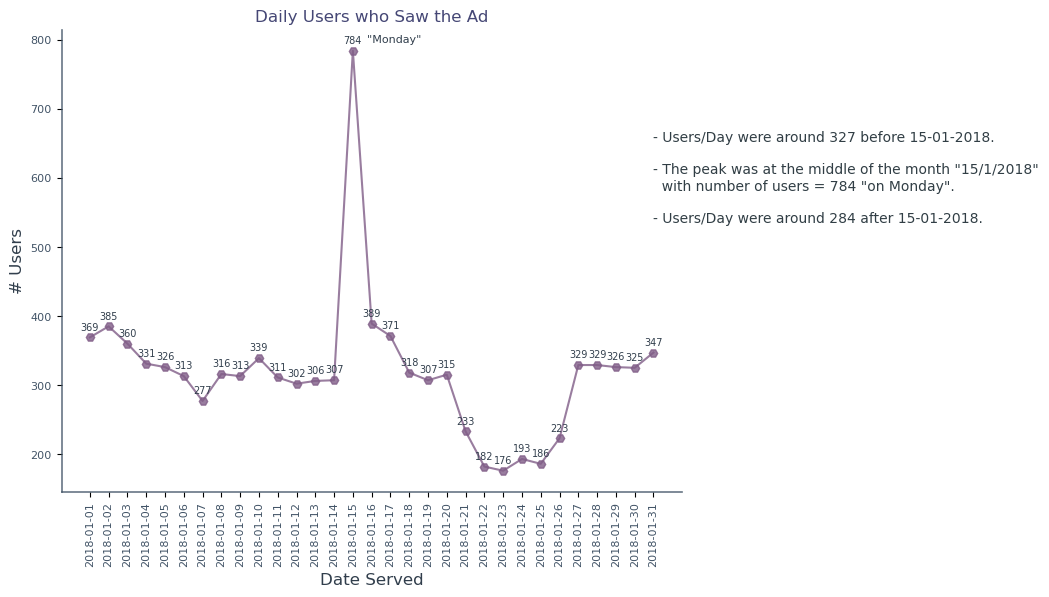

In [542]:
# Visualization - Number of daily users : 
#========================================#

f.line_plot(daily_users, '# Users')

# Additional Customization
plt.title('Daily Users who Saw the Ad')

# Findings
text_d_u = f'''
- Users/Day were around {np.mean(daily_users.iloc[:13,1]):.0f} before 15-01-2018.\n
- The peak was at the middle of the month "15/1/2018"
  with number of users = {daily_users['# Users'].max()} "on Monday".\n
- Users/Day were around {np.mean(daily_users.iloc[15:,1]):.0f} after 15-01-2018.\n  '''


plt.text(30, 600, text_d_u, va = 'center', ha = 'left', color = '#313E45')
plt.text('2018-01-15', daily_users['# Users'].max(), '    "Monday"\n\n', va = 'center', ha = 'left', color = '#313E4C', fontsize = 8);

<br> 

#### $\color{#454775}{2-}$ *Number of Weekday users:*

In [543]:
# Number of weekday users :
#=========================#

weekday_users = f.counting(marketing, ['dow'])#.rename(columns = {'dow': 'Day', 'user_id': '# Users'}).set_index('Day')

w_users = weekday_users.style.format({'Percentage' : '{:,.2%}'})

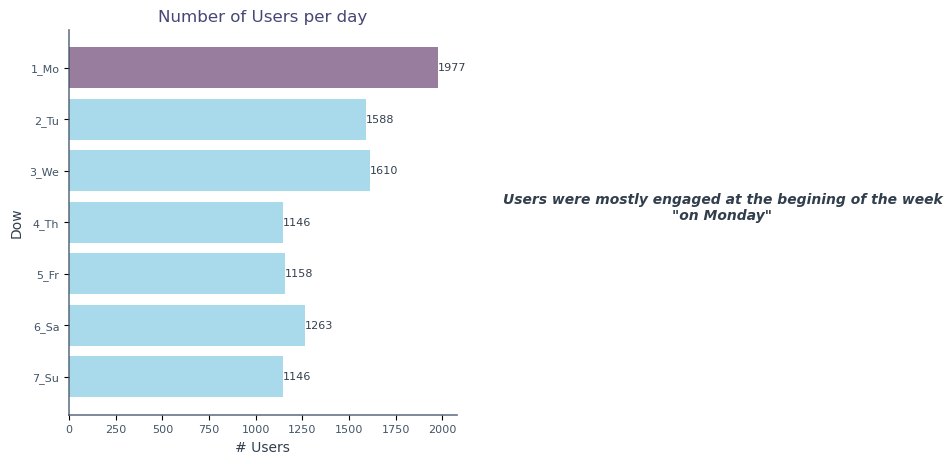

In [544]:
# Visualization - Number of weekday users:
#========================================#

f.hbar_plot(weekday_users, '# Users')

# Additional Customization
plt.title('Number of Users per day')

# Findings
text_w = ''' 
Users were mostly engaged at the begining of the week\n"on Monday"'''

plt.text(3500, 3, text_w, va = 'bottom', ha = 'center', color = '#313E4C', fontstyle = 'italic', weight = 'semibold', fontsize = 10);

<br> 

#### $\color{#454775}{3-}$ *Number of users according to variant classification:*

In [545]:
# Number of users according to variant categories 
#================================================#

var_users = f.counting(marketing, 'variant')

v_users = var_users.style.format({'Percentage' : '{:,.2%}'})

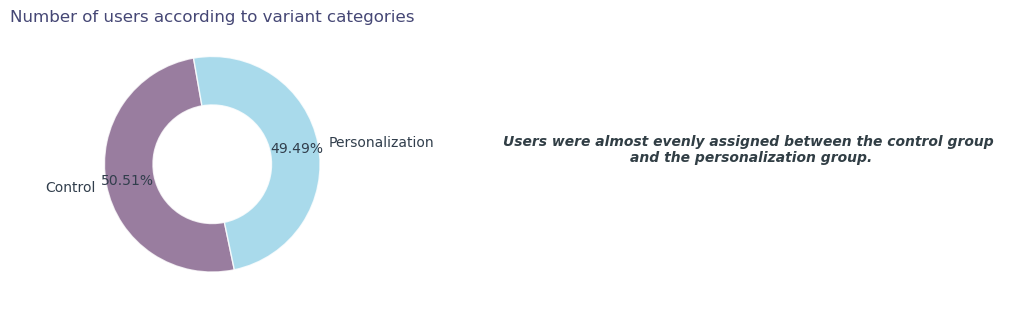

In [546]:
# Visualization - Number of users according to variant categories: 
#================================================================#

f.pie_plot(var_users, '# Users')

# Additional Customization
plt.title('Number of users according to variant categories')

# Findings
text_v = ''' 
Users were almost evenly assigned between the control group \nand the personalization group.'''

plt.text(5, 0, text_v, ha = 'center', va = 'bottom', fontsize = 10, weight = 'semibold', fontstyle = 'italic', color = '#313E45');

<br> 

#### $\color{#454775}{4-}$ *Number of converted users vs. non-converted users:*

In [547]:
# Number of converted users vs. non-converted users:
#==================================================#

converted_users = f.counting(marketing, 'converted')

converted_users.index = np.where(converted_users.index == True, 'Converted', 'Not_Converted')

c_users = converted_users.style.format({'Percentage' : '{:,.2%}'})

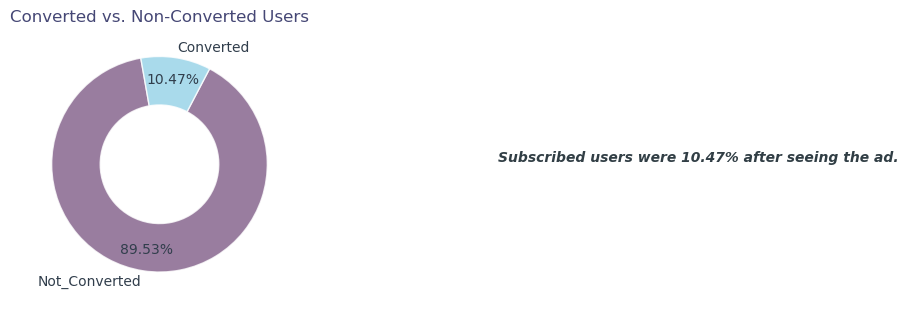

In [548]:
# Visualization - Number of converted users vs. non-converted users: 
#===================================================================#

f.pie_plot(converted_users, '# Users')

# Additional Customization
plt.title('Converted vs. Non-Converted Users')

# Findings
text_c = f''' 
Subscribed users were {converted_users.Percentage.min():.2%} after seeing the ad.'''

plt.text(5, 0, text_c, ha = 'center', va = 'bottom', fontsize = 10, weight = 'semibold', fontstyle = 'italic', color = '#313E45');

<br> 

#### $\color{#454775}{5-}$ *Displayed Lanaguage vs. Preferred Language:*

In [549]:
# Displayed Lanaguage vs. Preferred Language: 
#===========================================#

lang_displayed = f.counting(marketing, 'language_displayed')

lang_preferred = f.counting(marketing, 'language_preferred')

lang = lang_displayed.merge(lang_preferred, right_on = 'Language Preferred', left_index = True, suffixes = ('_Displayed', '_Preferred'))\
                     .sort_values('# Users_Displayed')

l = lang.style.format({"Percentage_Displayed" : "{:,.2%}", "Percentage_Preferred" : "{:,.2%}"})

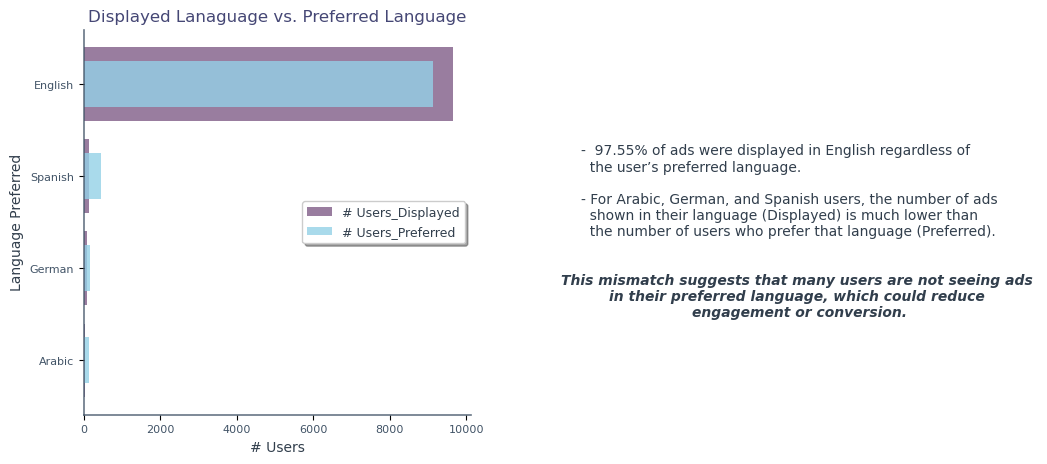

In [550]:
# Visualization - Displayed Lanaguage vs. Preferred Language:
#===========================================================#

f.stackedh_plot(lang,'# Users_Displayed', '# Users_Preferred')

# Additional Customization
plt.title('Displayed Lanaguage vs. Preferred Language')
plt.xlabel('# Users')

# Findings
text_l = f'''
- {lang.loc['English', 'Percentage_Displayed'] : .2%} of ads were displayed in English regardless of \n  the user’s preferred language.\n
- For Arabic, German, and Spanish users, the number of ads \n  shown in their language (Displayed) is much lower than 
  the number of users who prefer that language (Preferred).\n
'''

text2_l = '''
This mismatch suggests that many users are not seeing ads 
in their preferred language, which could reduce 
engagement or conversion.
'''

plt.text(13000, 1, text_l, color = '#313E4C')
plt.text(18700, .3, text2_l, ha = 'center',fontstyle = 'italic', weight = 'semibold' , fontsize = 10, color = '#313E4C');

In [551]:
# Mis-matched Languages occurrance Across Marketing Channels: 
#============================================================#

ch_lang_mismatch = f.counting(marketing.query('status == "mismatched_language"'), 'marketing_channel')

ch_lang_mismatch.columns = ['# Mismatched_Language', 'Percentage']

mismatch = ch_lang_mismatch.style.format({"Percentage" : "{:,.2%}"})

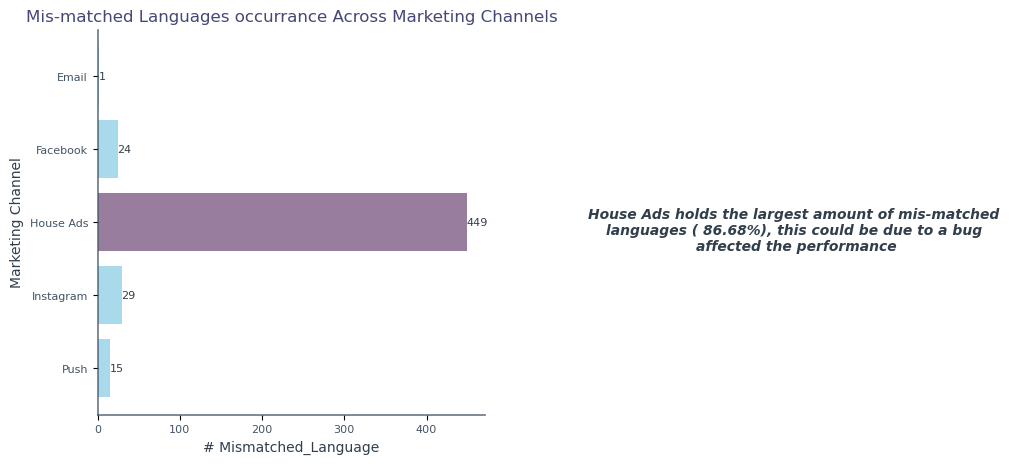

In [552]:
# Visualization - Mis-matched Languages occurrance Across Marketing Channels: 
#============================================================================#

f.hbar_plot(ch_lang_mismatch, '# Mismatched_Language')

# Additional Customization
plt.title('Mis-matched Languages occurrance Across Marketing Channels')

# Findings
text_ch_lang_mismatch = f''' 
House Ads holds the largest amount of mis-matched 
languages ({ch_lang_mismatch.Percentage.max() : .2%}), this could be due to a bug 
affected the performance'''

plt.text(850, 2, text_ch_lang_mismatch, ha = 'center', va = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C');

<br> 

#### $\color{#454775}{6-}$ *Distribution of age among users:*

In [553]:
# Distribution of age among users: 
#=================================#

age_distribution = f.uniques(marketing, 'age_group')

age_distribution.index = [x.replace(' years', '') for x in age_distribution.index]

age_dist = age_distribution.style.format({'Percentage' : '{:,.2%}'})

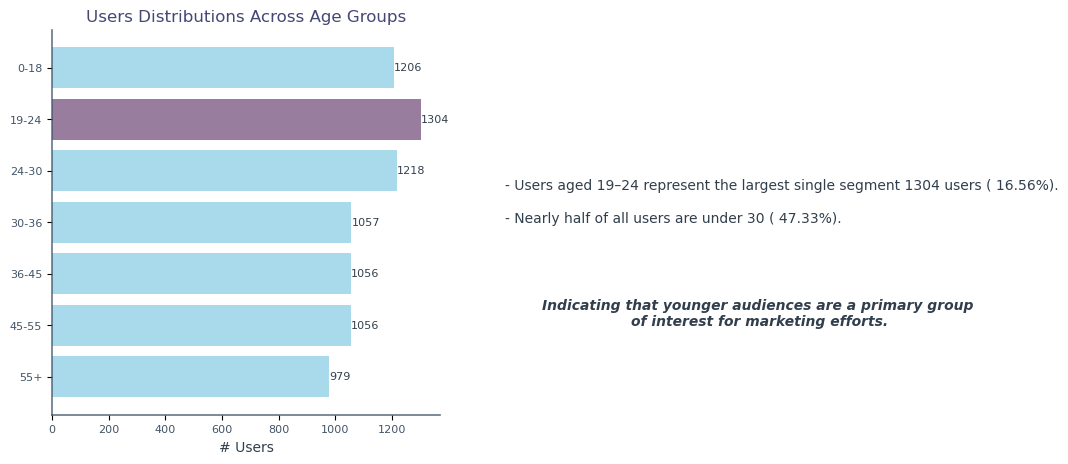

In [554]:
# Visualization - Distribution of age among users:
#=================================================#

f.hbar_plot(age_distribution, '# Users') 

# Additional Customization
plt.title('Users Distributions Across Age Groups')

# Findings
text_age_d = f'''
- Users aged 19–24 represent the largest single segment {age_distribution['# Users'].max()} users ({age_distribution.Percentage.max() : .2%}).\n
- Nearly half of all users are under 30 ({age_distribution.iloc[:3,1].sum() : .2%}).'''

text2_age_d=''' 
Indicating that younger audiences are a primary group \nof interest for marketing efforts.'''

plt.text(1600, 3, text_age_d, color = '#313E4C')
plt.text(2500, 5, text2_age_d, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C');

<br> 

#### $\color{#454775}{7-}$ *Marketing Channels:*

In [555]:
# Number of users for each marketing channel:
#===========================================#

ch_users = f.counting(marketing, 'marketing_channel').sort_values('# Users', ascending = False)

ch = ch_users.style.format({'Percentage' : '{:.2%}'})

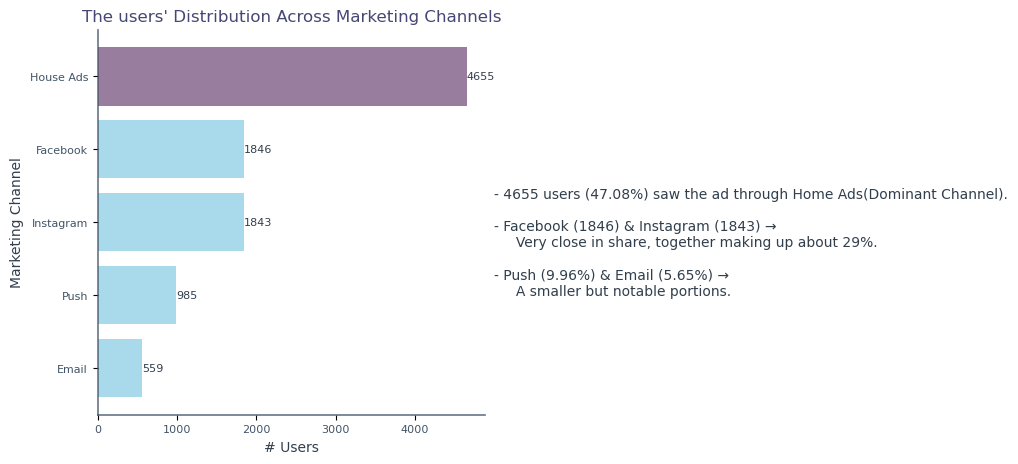

In [556]:
# Visualization - Number of users for each marketing channel:
#============================================================#

f.hbar_plot(ch_users, '# Users') 

# Additional Customization
plt.title("The users' Distribution Across Marketing Channels")

# Findings
text_ch_u=f'''
- {ch_users['# Users'].max()} users ({ch_users.Percentage.max():.2%}) saw the ad through Home Ads(Dominant Channel).\n
- Facebook ({ch_users.iloc[1,0]}) & Instagram ({ch_users.iloc[2,0]}) → 
     Very close in share, together making up about {ch_users.iloc[3,1]+ch_users.iloc[2,1]:.0%}.\n
- Push ({ch_users.iloc[3,1]:.2%}) & Email ({ch_users.iloc[4,1]:.2%}) → 
     A smaller but notable portions.'''

plt.text(5000, 3, text_ch_u, color = '#313E4C');

In [557]:
# Subscribing Channels: 
#=====================# 

sub_channel = f.uniques(marketing, 'subscribing_channel').rename(columns = {'# Users' : '# Subscribers'})\
                                                         .sort_values('# Subscribers', ascending = False)

sub = sub_channel.style.format({'Percentage' : '{:,.2%}'})

In [558]:
# Retained Subscribers : 
#======================# 

retained = f.uniques(marketing.query('is_retained == True'),'subscribing_channel').rename(columns = {'# Users' : "# Retained"})

ret = retained.style.format({'Percentage' : '{:,.2%}'})

In [559]:
# Merging subscribing channeles and retained subscribers: 
#========================================================#

subscribers = sub_channel.merge(retained, on = 'Subscribing Channel').iloc[:, [0,2]].sort_values('# Subscribers')

subscribers['Middle Point'] = (subscribers['# Subscribers']/2)

sub_status = subscribers.style.format({'Middle Point' : '{:.0f}'})

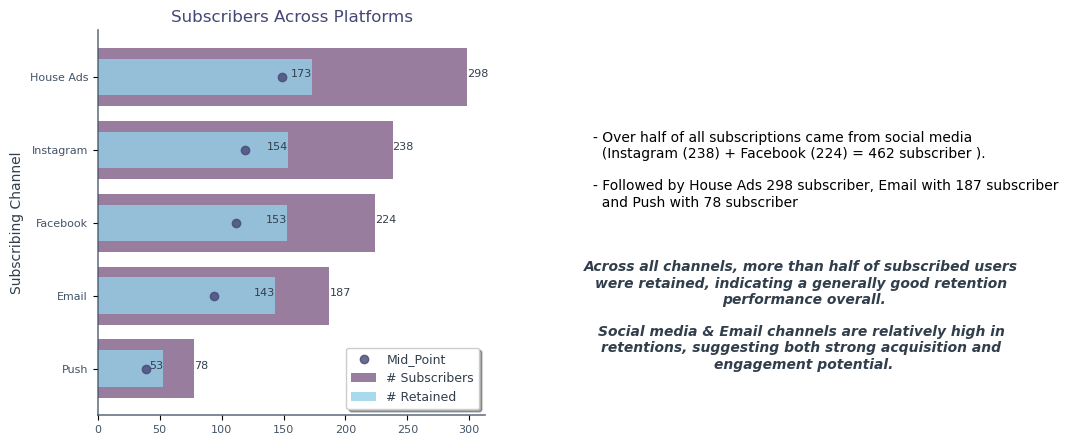

In [560]:
# Visualization - subscribing channeles and retained subscribers: 
#================================================================#

f.stackedh_plot(subscribers, '# Subscribers', '# Retained')

mid_point=subscribers['Middle Point']
plt.scatter(mid_point, subscribers.index.to_list(), label = 'Mid_Point', color = '#454775', alpha = .8)

# Additional Customization
plt.title('Subscribers Across Platforms')
plt.legend(fontsize = 9, labelcolor = '#313E4C', loc = 'lower right', fancybox = True, shadow = True)

# Annotating bars with values
for i, v in enumerate(subscribers['# Subscribers']): 
    plt.text(v, i, v, fontsize = 8, color = '#313E4C')

for i, v in enumerate(subscribers['# Retained']): 
    plt.text(v, i, v, ha = 'right', fontsize = 8, color = '#313E4C')

# Findings
text_sub = f''' 
- Over half of all subscriptions came from social media 
  (Instagram ({subscribers.iloc[3,0]}) + Facebook ({subscribers.iloc[2,0]}) = {subscribers.iloc[3,0]+subscribers.iloc[2,0]} subscriber ).\n
- Followed by House Ads {subscribers.iloc[4,0]} subscriber, Email with {subscribers.iloc[1,0]} subscriber
  and Push with {subscribers.iloc[0,0]} subscriber
'''

text2_sub = '''
Across all channels, more than half of subscribed users \nwere retained, indicating a generally good retention \nperformance overall.\n
Social media & Email channels are relatively high in \nretentions, suggesting both strong acquisition and \nengagement potential.'''

plt.text(400, 2, text_sub)
plt.text(570, 0, text2_sub, ha = 'center',fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show()

In [561]:
# Exposures to Ad: 
#================#

repeated_ads = f.uniques(marketing, 'ad_exposure')

r_ads = repeated_ads.style.format({'Percentage' : '{:,.2%}'})

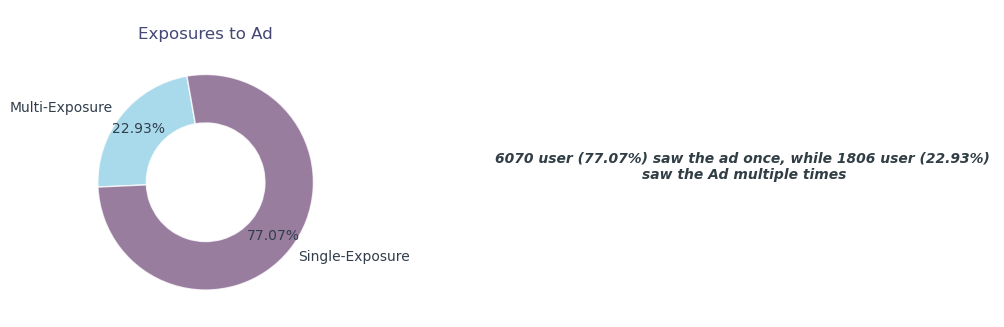

In [562]:
# Visualization - Exposures to Ad: 
#================================# 

f.pie_plot(repeated_ads, '# Users')
plt.title('\nExposures to Ad')

text_repeat = f''' 
{repeated_ads.loc['Single-Exposure', '# Users']} user ({repeated_ads.loc['Single-Exposure', 'Percentage']:.2%}) saw the ad once, while {repeated_ads.loc['Multi-Exposure', '# Users']} user ({repeated_ads.loc['Multi-Exposure', 'Percentage']:.2%}) 
saw the Ad multiple times'''

plt.text(5, 0, text_repeat, ha = 'center', va = 'bottom', fontsize = 10, weight = 'semibold', fontstyle = 'italic', color = '#313E45');

<br>

### $\color{#454775}{\sf Influence\;Factors:}$
### $\color{#454775}{Q1:}$ ***What factors most strongly influence user Conversion and Retention Rates?***

<br>

#### *Conversion & Retention Rates*

In [563]:
# 1- Overall Conversion Rate:
#===========================#

# Creating converted_users table:
converted_users = marketing.query('converted == True')

# Calculating The Overall Conversion Rate
converted=converted_users.user_id.nunique()
total_users = marketing.user_id.nunique()

conversion_rate = converted/total_users


# 2- Overall Retention Rate (spaning 1 month):
#=============================================#

# Creating retained_users table:
retained_users = converted_users.query('is_retained == True') 

# Calculating The Overall Retention Rate
retained=retained_users.user_id.nunique()

retention_rate = retained/converted 


# Result: 
#=======#

data = {'' : ['Conversion Rate', 'Retention Rate'], 
        'Rate' : [f'{conversion_rate : .2%}' , f'{retention_rate : .2%}']}

rate = pd.DataFrame(data).set_index('')

rate

Rate
                        
Conversion Rate   13.01%
Retention Rate    65.95%

<br> 

#### $\color{#454775}{1-}$ *Marketing Channels:*

In [564]:
# Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
#===========================================================================#

performance_ch = f.comparison(marketing, converted_users, retained_users, ['marketing_channel'], 'user_id')

performance_ch.style.format({'Conversion Rate' : '{:,.2%}' , 'Retention Rate' : '{:,.2%}'})

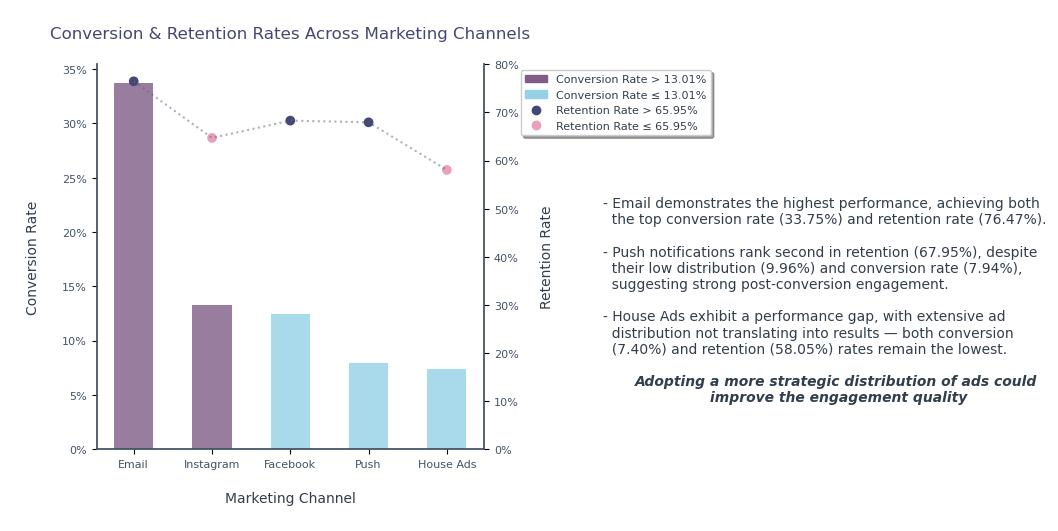

In [565]:
# Visualization - Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
#===========================================================================================#
f.combo(performance_ch, 'Conversion Rate', 'Retention Rate', conversion_rate, retention_rate)

# Additional Customization
plt.title('\nConversion & Retention Rates Across Marketing Channels\n')

# Findings
text_perform_ch = f'''
- Email demonstrates the highest performance, achieving both  
  the top conversion rate ({performance_ch['Conversion Rate'].max():.2%}) and retention rate ({performance_ch['Retention Rate'].max():.2%}).\n
- Push notifications rank second in retention ({performance_ch.iloc[3,1]:.2%}), despite 
  their low distribution ({ch_users[ch_users.index =="Push"].iloc[0,1]:.2%}) and conversion rate ({performance_ch.iloc[3,0]:.2%}), 
  suggesting strong post-conversion engagement.\n
- House Ads exhibit a performance gap, with extensive ad   
  distribution not translating into results — both conversion 
  ({performance_ch['Conversion Rate'].min():.2%}) and retention ({performance_ch['Retention Rate'].min():.2%}) rates remain the lowest.'''

text2_perform_ch = '''
Adopting a more strategic distribution of ads could 
improve the engagement quality'''

plt.text(6, .2, text_perform_ch, color = '#313E4C')
plt.text(9, .1, text2_perform_ch, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show();

<br>

#### $\color{#454775}{2-}$ *Variant Classification:*

In [566]:
# Comparing Conversion Rates with Retention Rates Within Variant Classification: 
#===============================================================================# 

performance_var = f.comparison(marketing, converted_users, retained_users, ['variant'], 'user_id')

performance_var.style.format({'Conversion Rate' : '{:,.2%}','Retention Rate' : '{:,.2%}'})

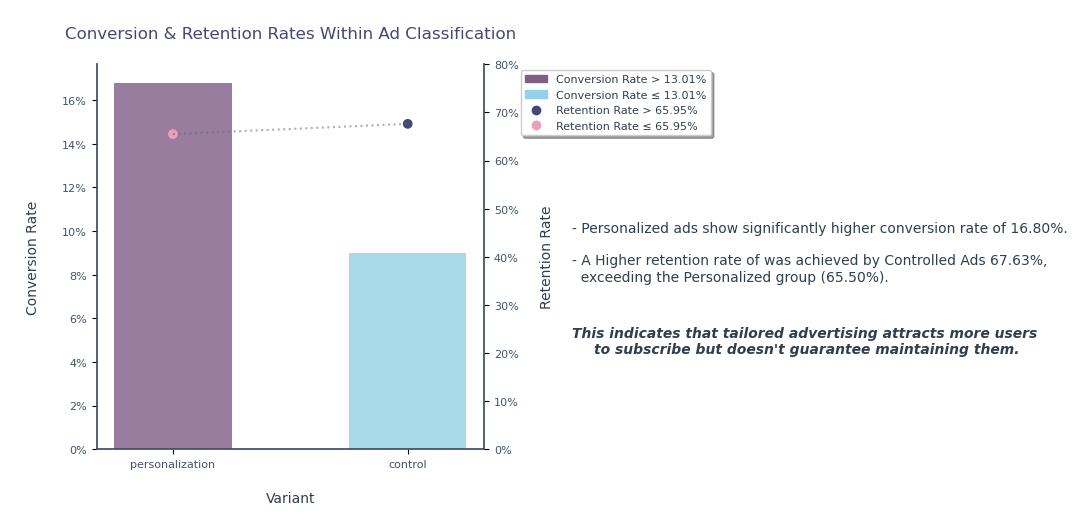

In [567]:
# Visualization - Comparing Conversion Rates with Retention Rates Within Variant Classification: 
#==============================================================================================#

f.combo(performance_var, 'Conversion Rate', 'Retention Rate',  conversion_rate, retention_rate)

# Additional Customization
plt.title('\nConversion & Retention Rates Within Ad Classification\n', fontsize=12, color='#454775')

# Findings
text_perform_var=f'''
- Personalized ads show significantly higher conversion rate of {performance_var['Conversion Rate'].max():.2%}.\n 
- A Higher retention rate of was achieved by Controlled Ads {performance_var['Retention Rate'].max():.2%},  
  exceeding the Personalized group ({performance_var['Retention Rate'].min():.2%}).'''

text2_perform_var='''
This indicates that tailored advertising attracts more users 
to subscribe but doesn't guarantee maintaining them.'''

plt.text(1.7,.35,text_perform_var, color='#313E4C')
plt.text(2.7,.2,text2_perform_var, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

#### $\color{#454775}{3-}$ *Displayed Language:*

In [568]:
# Comparing Conversion Rates with Retention Rates Across Displayed Languages: 
#===========================================================================#

performance_displayed_lang = f.comparison(marketing, converted_users, retained_users, ['language_displayed'], 'user_id')

performance_displayed_lang.style.format({'Conversion Rate' : '{:,.2%}', 'Retention Rate' : '{:,.2%}'})

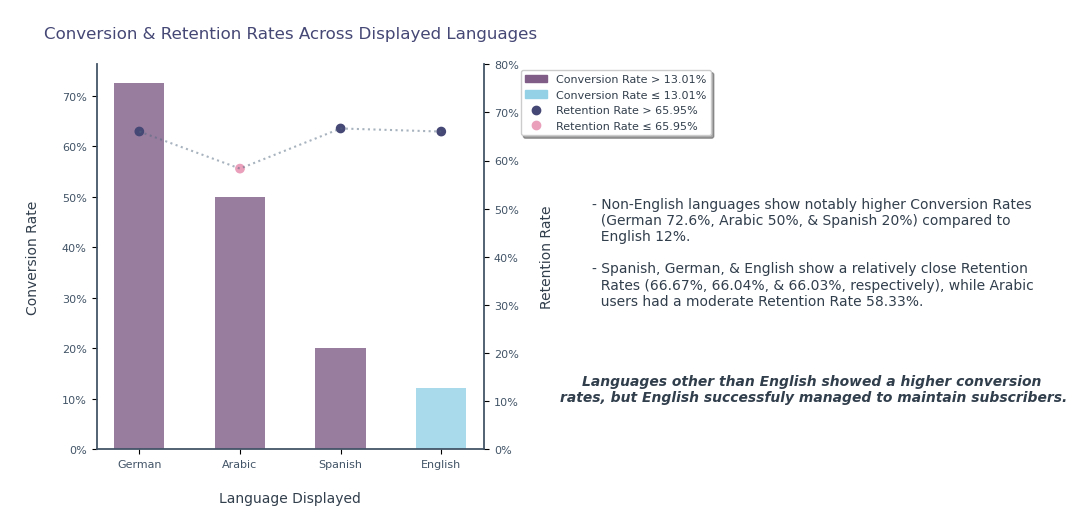

In [569]:
# Visualization - Comparing Conversion Rates with Retention Rates Across Displayed Languages:
#============================================================================================#

f.combo(performance_displayed_lang, 'Conversion Rate', 'Retention Rate', conversion_rate, retention_rate)

# Additional Customization
plt.title('\nConversion & Retention Rates Across Displayed Languages\n')

# Findings
text1_perform_dlang = f''' 
- Non-English languages show notably higher Conversion Rates 
  (German {performance_displayed_lang.loc['German','Conversion Rate']:.1%}, Arabic {performance_displayed_lang.loc['Arabic','Conversion Rate']:.0%}, & Spanish {performance_displayed_lang.loc['Spanish','Conversion Rate']:.0%}) compared to 
  English {performance_displayed_lang.loc['English','Conversion Rate']:.0%}.\n
- Spanish, German, & English show a relatively close Retention 
  Rates ({performance_displayed_lang.loc['Spanish','Retention Rate']:.2%}, {performance_displayed_lang.loc['German','Retention Rate']:.2%}, & {performance_displayed_lang.loc['English','Retention Rate']:.2%}, respectively), while Arabic 
  users had a moderate Retention Rate {performance_displayed_lang.loc['Arabic','Retention Rate']:.2%}.'''

text2_perform_dlang = '''
Languages other than English showed a higher conversion 
rates, but English successfuly managed to maintain subscribers.'''

plt.text(4.5, .3, text1_perform_dlang, color = '#313E4C')
plt.text(6.7, .1, text2_perform_dlang, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show();

<br>

#### $\color{#454775}{4-}$ *Matched Language:*

In [570]:
# Comparing Conversion Rates with Retention Rates Within Matched & Not-Matched Languages:
#========================================================================================#

performance_lang = f.comparison(marketing, converted_users, retained_users, ['status'], 'user_id')

performance_lang.style.format({'Conversion Rate' : '{:,.2%}', 'Retention Rate' : '{:,.2%}'})

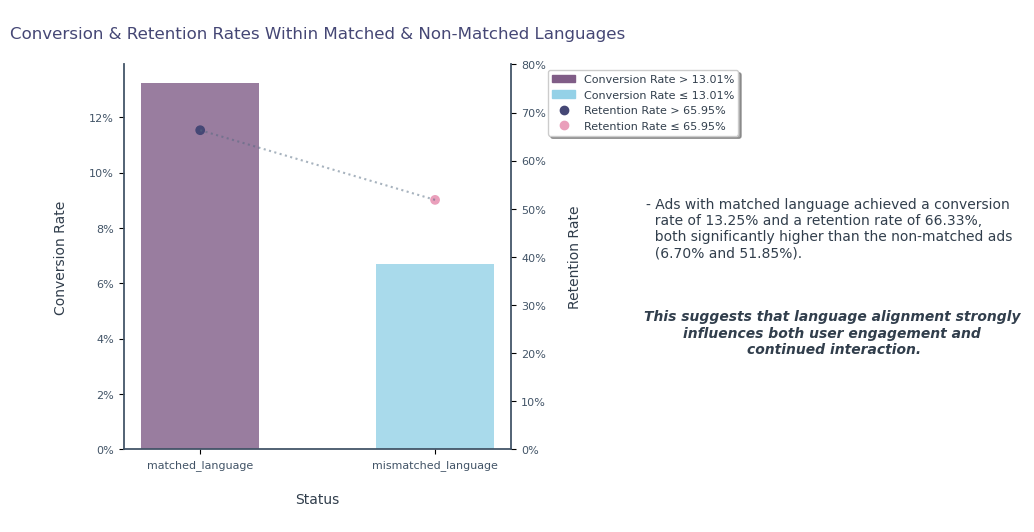

In [571]:
# Visualization - Comparing Conversion Rates with Retention Rates Within Matched & Not-Matched Languages:
#========================================================================================================#

f.combo(performance_lang, 'Conversion Rate', 'Retention Rate', conversion_rate, retention_rate)

# Additional Customization
plt.title('\nConversion & Retention Rates Within Matched & Non-Matched Languages\n')

# Findings
text_perform_lstatus = f'''
- Ads with matched language achieved a conversion 
  rate of {performance_lang.iloc[0,0]:.2%} and a retention rate of {performance_lang.iloc[0,1]:.2%}, 
  both significantly higher than the non-matched ads 
  ({performance_lang.iloc[1,0]:.2%} and {performance_lang.iloc[1,1]:.2%}).'''

text2_perform_lstatus = '''
This suggests that language alignment strongly 
influences both user engagement and 
continued interaction.'''

plt.text(1.9, .4, text_perform_lstatus, color = '#313E4C')
plt.text(2.7, .2, text2_perform_lstatus, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show();

> $\color{#454775}{Note}:$<br>
> _The huge gap between the number of users with matched language (7531 user) and the nit matched language (403 users) should be taken into consideration when further investigating these noticable gaps in conversion and retention rates._

<br>

#### $\color{#454775}{5-}$ *Age Groups:*

In [572]:
# Comparing Conversion Rates with Retention Rates within Age Groups:
#===================================================================#

performance_age=f.comparison(marketing,converted_users,retained_users,['age_group'],'user_id').sort_index()

performance_age.index=[x.replace(' years','') for x in performance_age.index.to_list()]

performance_age.index.name = 'Age Group'

performance_age.style.format({'Conversion Rate':'{:,.2%}','Retention Rate':'{:,.2%}'})

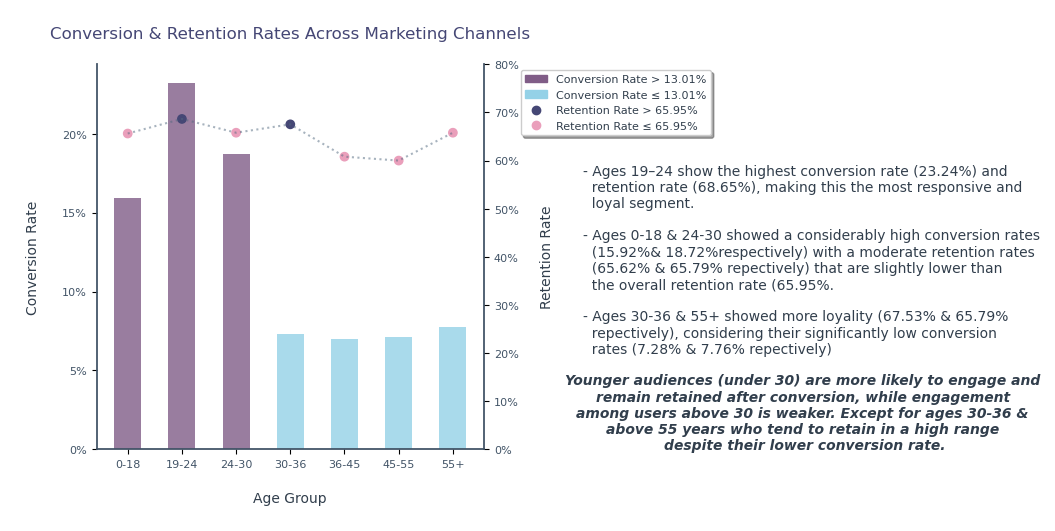

In [573]:
# Visualization - Comparing Conversion Rates with Retention Rates within Age Groups:
#==================================================================================#

f.combo(performance_age, 'Conversion Rate', 'Retention Rate', conversion_rate, retention_rate)

# Additional Customization
plt.title('\nConversion & Retention Rates Across Marketing Channels\n')
# Findings
text_perform_age = f'''
- Ages 19–24 show the highest conversion rate ({performance_age['Conversion Rate'].max():.2%}) and 
  retention rate ({performance_age['Retention Rate'].max():.2%}), making this the most responsive and 
  loyal segment.\n
- Ages 0-18 & 24-30 showed a considerably high conversion rates 
  ({performance_age.loc['0-18','Conversion Rate']:.2%}& {performance_age.loc['24-30','Conversion Rate']:.2%}respectively) with a moderate retention rates 
  ({performance_age[performance_age.index =='0-18'].iloc[0,1]:.2%} & {performance_age[performance_age.index =='24-30'].iloc[0,1]:.2%} repectively) that are slightly lower than 
  the overall retention rate ({retention_rate:.2%}.\n
- Ages 30-36 & 55+ showed more loyality ({performance_age.loc['30-36','Retention Rate']:.2%} & {performance_age.loc['55+','Retention Rate']:.2%} 
  repectively), considering their significantly low conversion 
  rates ({performance_age.loc['30-36','Conversion Rate']:.2%} & {performance_age.loc['55+','Conversion Rate']:.2%} repectively)'''

text2_perform_age = '''
Younger audiences (under 30) are more likely to engage and 
remain retained after conversion, while engagement 
among users above 30 is weaker. Except for ages 30-36 & 
above 55 years who tend to retain in a high range 
despite their lower conversion rate.'''

plt.text(8.4, .2, text_perform_age, color = '#313E4C')
plt.text(12.5, 0, text2_perform_age, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show();

<br>

#### $\color{#454775}{6-}$ *Date Served:*

In [574]:
# Calculating Conversion Rate Within Served Dates: 
#================================================# 

performance_date = f.comparison(marketing, converted_users, retained_users, ['date_served'], 'user_id').sort_index()

performance_date.index = performance_date.index.astype('str')

p_date = performance_date.style.format({'Conversion Rate' : '{:,.2%}' , 'Retention Rate' : '{:,.2%}'})

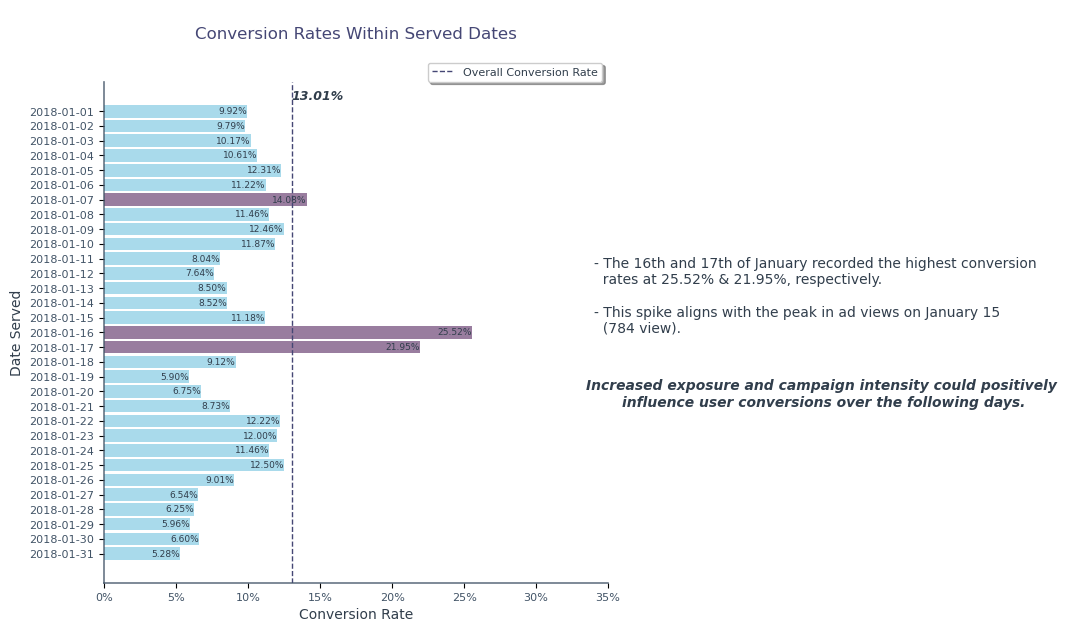

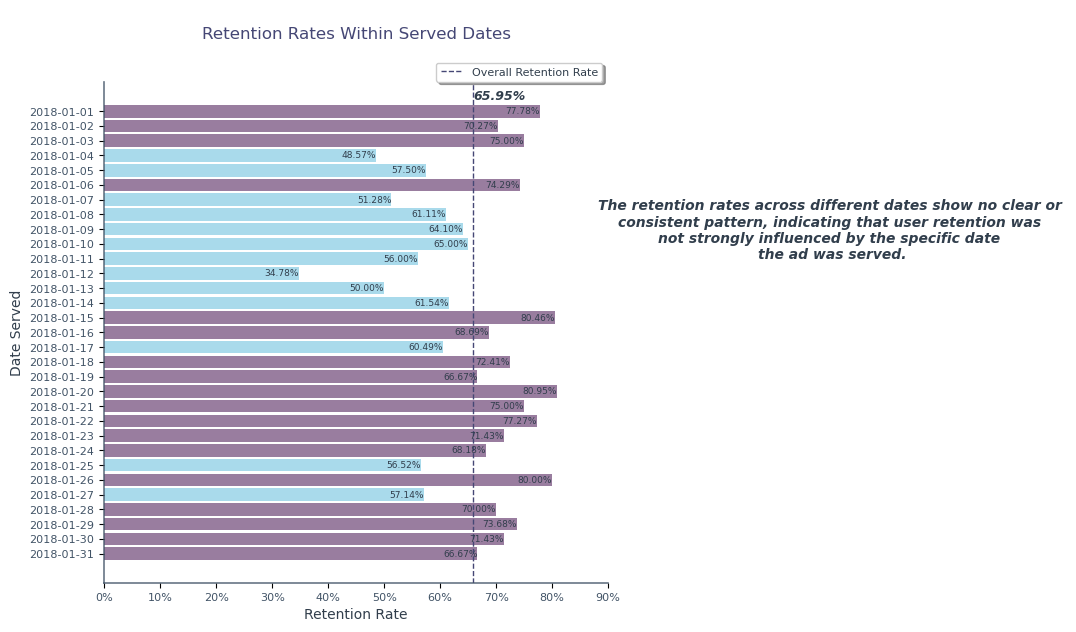

In [575]:
# 1- Visualization - Conversion Rates Within Served Dates: 
#=========================================================# 

f.h_bar(performance_date, 'Conversion Rate', conversion_rate)

# Additional Customization
plt.title('\nConversion Rates Within Served Dates\n\n') 
plt.xticks(np.arange(0,.40,.05), [f'{x:.0%}' for x in np.arange(0,.4,.05)])

# Findings 
text_con_sdate=f'''
- The 16th and 17th of January recorded the highest conversion 
  rates at {performance_date['Conversion Rate'].to_list()[15]:.2%} & {performance_date['Conversion Rate'][16]:.2%}, respectively.\n
- This spike aligns with the peak in ad views on January 15 
  ({daily_users['# Users'].max()} view).'''

text2_con_sdate='''
Increased exposure and campaign intensity could positively 
influence user conversions over the following days.'''

plt.text(.34, 15, text_con_sdate, color = '#313E4C')
plt.text(.5, 20, text2_con_sdate, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show()

                                        #---------------------------------------------------------------#

# 2- Visualization - Retention Rates Within Served Dates: 
#========================================================#
f.h_bar(performance_date, 'Retention Rate', retention_rate)

# Additional Customization 
plt.title('\nRetention Rates Within Served Dates\n\n')

plt.xticks(np.arange(0,1,.1), [f'{x:.0%}' for x in np.arange(0,1,.1)])

# Findings 
text_ret_sdate='''
The retention rates across different dates show no clear or 
consistent pattern, indicating that user retention was 
not strongly influenced by the specific date 
the ad was served.'''

plt.text(1.3, 10, text_ret_sdate, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show()

<br>

### $\color{#454775}{Q2:}$ ***Is there evidence that multi-touch exposure (users seeing multiple ads) improves conversion or retention rates?***


In [576]:
# Conversion & Retention Rates Across Single & Multi-Touch Exposure:
#================================================================== #

performance_exposure = f.comparison(marketing, converted_users, retained_users, ['ad_exposure'], 'user_id')

performance_exposure.style.format({'Conversion Rate' : '{:,.2%}', 'Retention Rate' : "{:,.2%}"})

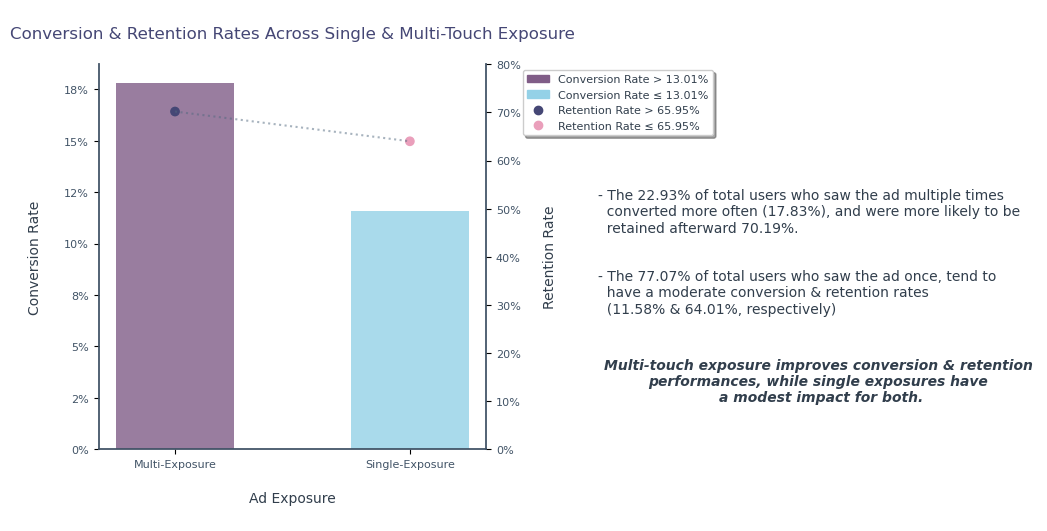

In [577]:
# Visualization - Conversion & Retention Rates Across Single & Multi-Touch Exposure:
f.combo(performance_exposure,'Conversion Rate',	'Retention Rate',conversion_rate,retention_rate)
plt.title('\nConversion & Retention Rates Across Single & Multi-Touch Exposure\n')

# Findings
text_perform_exposure=f'''
- The {repeated_ads.loc['Multi-Exposure', 'Percentage']:.2%} of total users who saw the ad multiple times 
  converted more often ({performance_exposure['Conversion Rate'].max():.2%}), and were more likely to be 
  retained afterward {performance_exposure['Retention Rate'].max():.2%}.\n

- The {repeated_ads.loc['Single-Exposure', 'Percentage']:.2%} of total users who saw the ad once, tend to 
  have a moderate conversion & retention rates 
  ({performance_exposure['Conversion Rate'].min():.2%} & {performance_exposure['Retention Rate'].min():.2%}, respectively)
'''

text2_perform_exposure='''
Multi-touch exposure improves conversion & retention 
performances, while single exposures have 
a modest impact for both.'''

plt.text(1.8,.25,text_perform_exposure, color='#313E4C', ha='left')
plt.text(2.75,.1,text2_perform_exposure, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

> Note
> _The multi-touch versus single-exposure groups may also include self-selection bias, where more engaged users receive more ad impressions, inflating conversion and retention rates._

## Recommendation

To improve reliability and reduce bias in future analyses, it is recommended to ensure balanced sample sizes across demographic segments and apply randomization techniques when assigning ad types and exposure levels. Additionally, incorporating statistical validation methods such as confidence intervals, cohort filtering, and weighted averages can help stabilize rate fluctuations and provide a more accurate representation of performance. Completing missing data or excluding insufficiently sized groups will further strengthen the validity of the conclusions.

<br>

### $\color{#454775}{\sf Demographic\;Influence:}$
### $\color{#454775}{Q3:}$ ***What is the impact of Demographics on conversion & Retention Rates?***


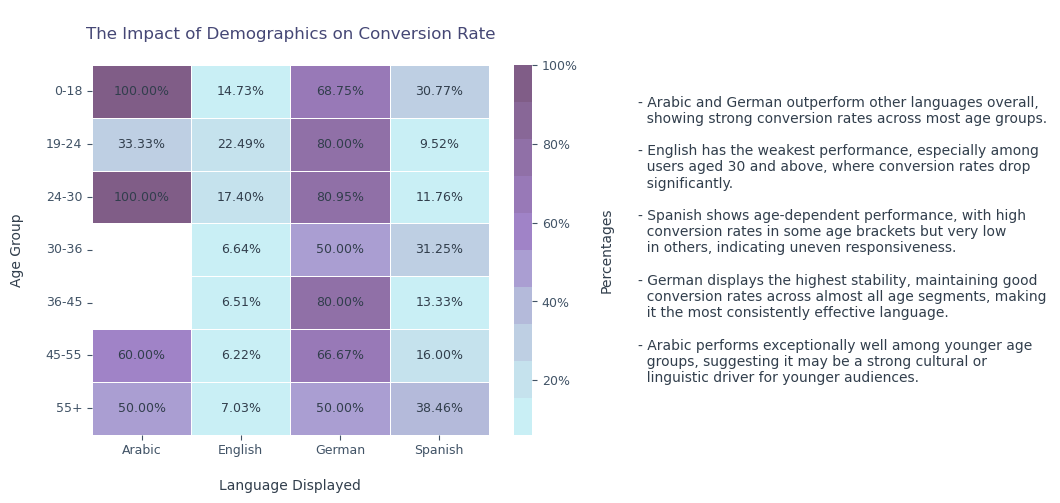

In [578]:
# The Impact of Demographics on Conversion Rate: 
#===============================================#

# Visualization - The Impact of Demographics on Conversion Rate
conversion_lang_age = f.con_ret(marketing, converted_users, ['language_displayed', 'age_group'], 'user_id')

conversion_lang_age['Age Group'] = [x.replace(' years' , '') for x in conversion_lang_age['Age Group']] 

f.heatmap_chart(conversion_lang_age)

# Additional Customaization: 
plt.title('\nThe Impact of Demographics on Conversion Rate\n')

#Findings:
text_lang_age = f'''
- Arabic and German outperform other languages overall, 
  showing strong conversion rates across most age groups.\n
- English has the weakest performance, especially among 
  users aged 30 and above, where conversion rates drop 
  significantly.\n
- Spanish shows age-dependent performance, with high 
  conversion rates in some age brackets but very low 
  in others, indicating uneven responsiveness.\n
- German displays the highest stability, maintaining good 
  conversion rates across almost all age segments, making 
  it the most consistently effective language.\n
- Arabic performs exceptionally well among younger age 
  groups, suggesting it may be a strong cultural or 
  linguistic driver for younger audiences.'''

plt.text(5.5, 6, text_lang_age, color = '#313E4C', ha = 'left');

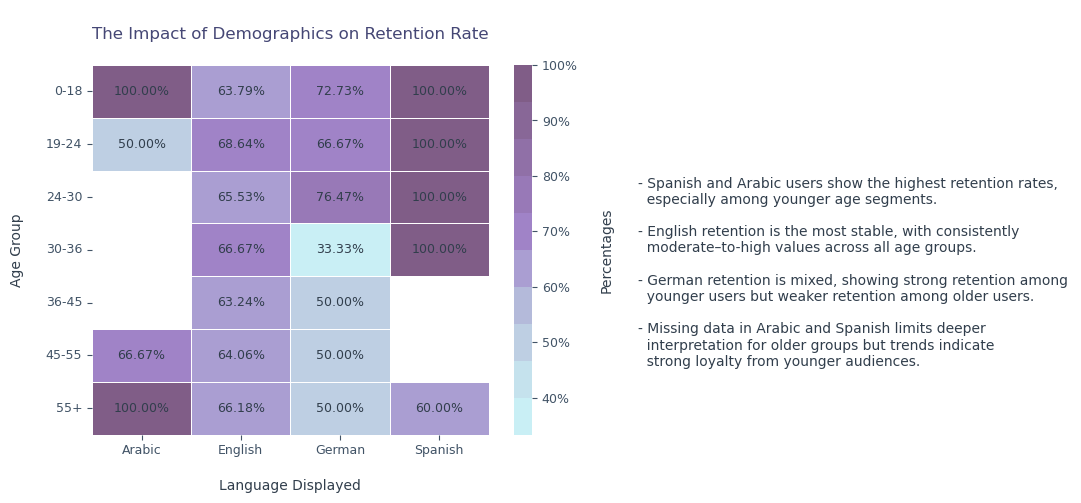

In [579]:
# The Impact of Demographics on Retention Rate: 
#===============================================#

# Visualization - The Impact of Demographics on Conversion Rate:
retention_lang_age = f.con_ret(converted_users, retained_users, ['language_displayed', 'age_group'], 'user_id')

retention_lang_age['Age Group'] = [x.replace(' years','') for x in retention_lang_age['Age Group']] 

f.heatmap_chart(retention_lang_age)

# Additional Customaization: 
plt.title('\nThe Impact of Demographics on Retention Rate\n')
text_lang_age_ret = f'''
- Spanish and Arabic users show the highest retention rates, 
  especially among younger age segments.\n
- English retention is the most stable, with consistently 
  moderate–to-high values across all age groups.\n
- German retention is mixed, showing strong retention among 
  younger users but weaker retention among older users.\n
- Missing data in Arabic and Spanish limits deeper 
  interpretation for older groups but trends indicate 
  strong loyalty from younger audiences.\n'''

plt.text(5.5, 6, text_lang_age_ret, color = '#313E4C', ha = 'left');

>$\color{#454775}{Note:}$ <br>
> _Upon reviewing the conversion and retention metrics, it is evident that several bias factors may be influencing the observed results._
>  - _The distribution of users across languages and age groups is highly uneven, with some segments containing very small sample sizes, leading to extreme or unrealistic retention values such as 100% or 0%._
>  - _In addition, the presence of missing values (NaNs) reduces comparability between categories and introduces uncertainty into trend interpretation._


<br>

### $\color{#454775}{Q4:}$ ***Which combinations of age group and marketing channel yield the highest conversion rates?***

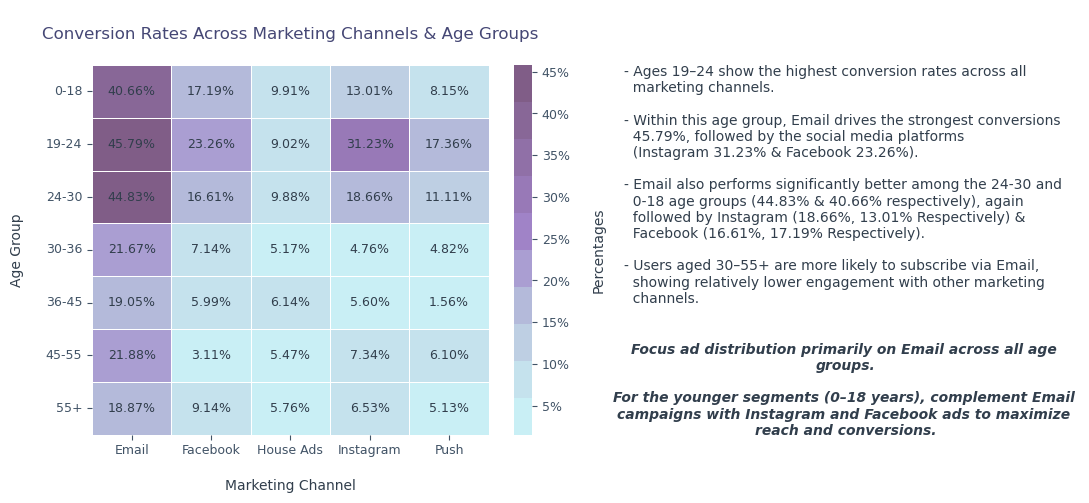

In [580]:
# Conversion Rates Across Marketing Channels & Age Groups: 
#========================================================# 

# Visualization:
conversion_ch_age = f.con_ret(marketing, converted_users, ['marketing_channel', 'age_group'], 'user_id')

conversion_ch_age['Age Group'] = [x.replace(' years','') for x in conversion_ch_age['Age Group']] 

f.heatmap_chart(conversion_ch_age)

# Additional Customization: 
plt.title('\nConversion Rates Across Marketing Channels & Age Groups\n')

# Findings:
text_ch_a_con = f''' 
- Ages 19–24 show the highest conversion rates across all 
  marketing channels.\n
- Within this age group, Email drives the strongest conversions 
  {conversion_ch_age.sort_index().iloc[1,2]:.2%}, followed by the social media platforms 
  (Instagram {conversion_ch_age.sort_index().iloc[22,2]:.2%} & Facebook {conversion_ch_age.sort_index().iloc[8,2]:.2%}).\n
- Email also performs significantly better among the 24-30 and 
  0-18 age groups ({conversion_ch_age.sort_index().iloc[2,2]:.2%} & {conversion_ch_age.sort_index().iloc[0,2]:.2%} respectively), again 
  followed by Instagram ({conversion_ch_age.sort_index().iloc[23,2]:.2%}, {conversion_ch_age.sort_index().iloc[21,2]:.2%} Respectively) & 
  Facebook ({conversion_ch_age.sort_index().iloc[9,2]:.2%}, {conversion_ch_age.sort_index().iloc[7,2]:.2%} Respectively).\n
- Users aged 30–55+ are more likely to subscribe via Email, 
  showing relatively lower engagement with other marketing 
  channels.'''

text2_ch_a_con = '''
Focus ad distribution primarily on Email across all age 
groups.\n
For the younger segments (0–18 years), complement Email 
campaigns with Instagram and Facebook ads to maximize 
reach and conversions.'''

plt.text(6.7, 4.5, text_ch_a_con, color = '#313E4C', ha = 'left')
plt.text(9.5, 7, text2_ch_a_con, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show()

<br>  

### $\color{#454775}{Q5:}$ ***How do ad type and user age interact to influence conversion and retention rates?***

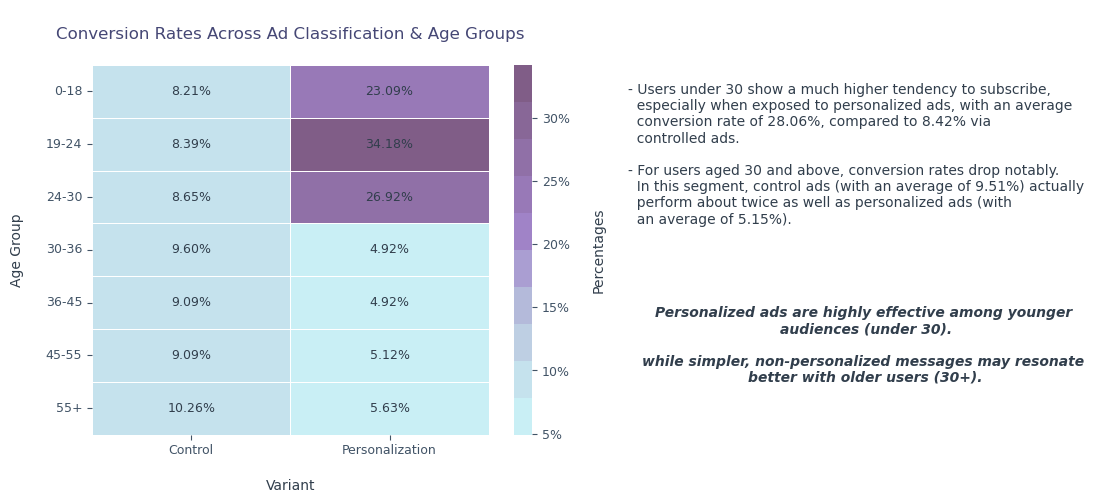

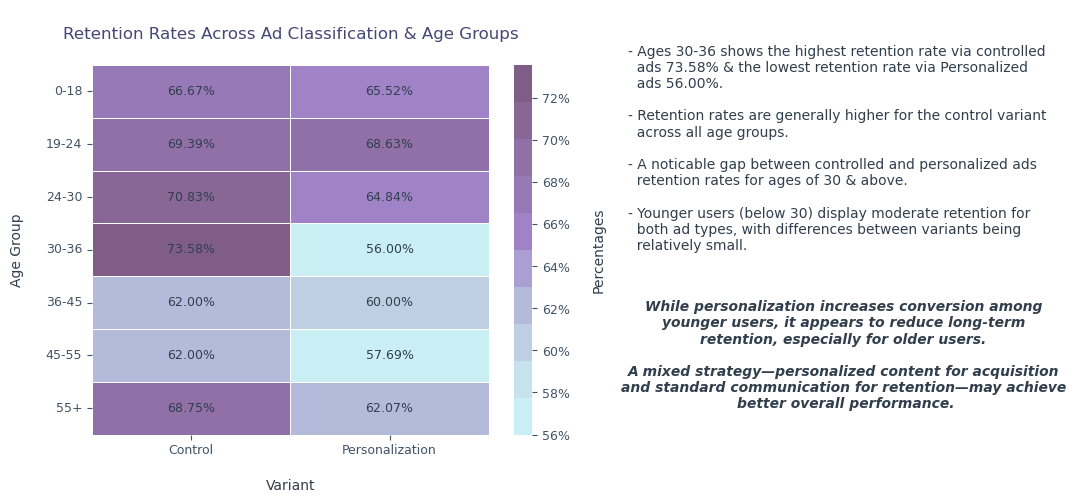

In [581]:
# Conversion Rates for the combinations of Ad Classification & Age groups: 
#========================================================================#

# 1- Visualiztion - Conversion Rates for the combinations of Ad Classification & Age groups:
#------------------------------------------------------------------------------------------#

conversion_var_age=f.con_ret(marketing,converted_users,['variant','age_group'],'user_id')

conversion_var_age['Age Group']=[x.replace(' years','') for x in conversion_var_age['Age Group']] 

conversion_var_age['Variant']=conversion_var_age['Variant'].apply(lambda x: x.title())

f.heatmap_chart(conversion_var_age)

# Additional Customization: 
plt.title('\nConversion Rates Across Ad Classification & Age Groups\n')

# Findings
text_var_age_c = f'''
- Users under 30 show a much higher tendency to subscribe, 
  especially when exposed to personalized ads, with an average 
  conversion rate of {np.mean(conversion_var_age.sort_values(['Variant','Age Group']).iloc[7:10,2]):.2%}, compared to {np.mean(conversion_var_age.sort_values(['Variant','Age Group']).iloc[:3,2]):.2%} via 
  controlled ads.\n
- For users aged 30 and above, conversion rates drop notably. 
  In this segment, control ads (with an average of {np.mean(conversion_var_age.sort_values(['Variant','Age Group']).iloc[3:7,2]):.2%}) actually 
  perform about twice as well as personalized ads (with 
  an average of {np.mean(conversion_var_age.sort_values(['Variant','Age Group']).iloc[10:,2]):.2%}).'''

text2_var_age_c = '''
Personalized ads are highly effective among younger 
audiences (under 30).\n
while simpler, non-personalized messages may resonate 
better with older users (30+).'''

plt.text(2.7, 3, text_var_age_c, color = '#313E4C', ha = 'left')
plt.text(3.9, 6, text2_var_age_c, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show()

                        #------------------------------------------------------------------------------------------#

# 2- Visualization - Retention Rates for the combinations of Ad Classification & Age groups:
#------------------------------------------------------------------------------------------#
retention_var_age = f.con_ret(converted_users, retained_users, ['variant','age_group'], 'user_id')

retention_var_age['Age Group'] = [x.replace(' years','') for x in retention_var_age['Age Group']] 

retention_var_age['Variant'] = retention_var_age['Variant'].apply(lambda x: x.title())

f.heatmap_chart(retention_var_age)

# Customizing the Chart:
plt.title('\nRetention Rates Across Ad Classification & Age Groups\n')

# Findings
text_var_age_r = f'''
- Ages 30-36 shows the highest retention rate via controlled 
  ads {retention_var_age.sort_values(['Variant','Age Group']).iloc[3,2]:.2%} & the lowest retention rate via Personalized 
  ads {retention_var_age.sort_values(['Variant','Age Group']).iloc[10,2]:.2%}.\n
- Retention rates are generally higher for the control variant 
  across all age groups.\n
- A noticable gap between controlled and personalized ads 
  retention rates for ages of 30 & above. \n
- Younger users (below 30) display moderate retention for 
  both ad types, with differences between variants being 
  relatively small.'''

text2_var_age_r = '''
While personalization increases conversion among 
younger users, it appears to reduce long-term 
retention, especially for older users. \n
A mixed strategy—personalized content for acquisition 
and standard communication for retention—may achieve 
better overall performance.'''

plt.text(2.7, 3.5, text_var_age_r, color = '#313E4C', ha = 'left')
plt.text(3.8, 6.5, text2_var_age_r, ha = 'center', fontstyle = 'italic', weight = 'semibold', fontsize = 10, color = '#313E4C')

plt.show()

<br>

### $\color{#454775}{\sf Subscription\;Pattern:}$
### $\color{#454775}{Q6:}$ ***How do daily user interactions influence subscription counts across different marketing channels?***


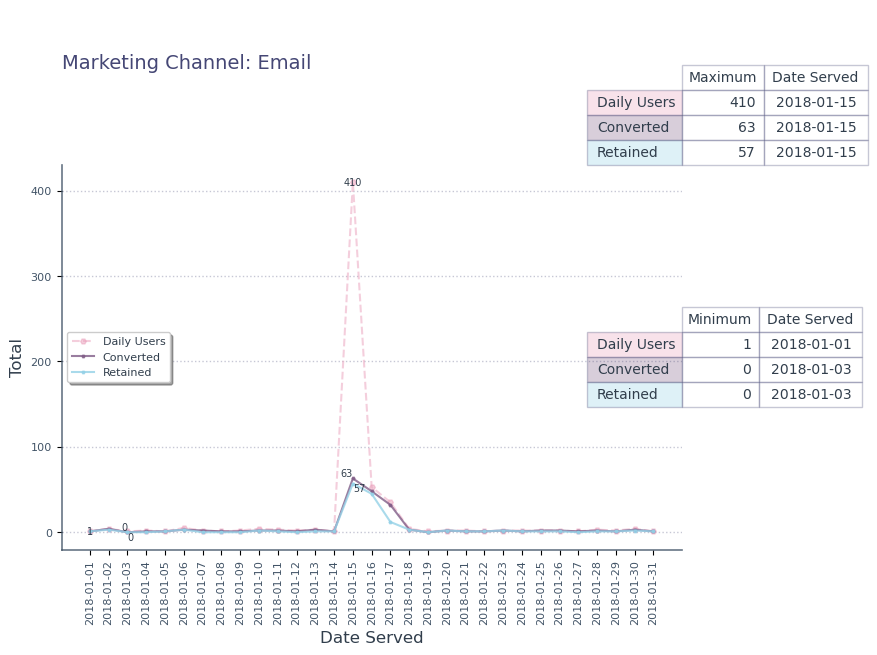

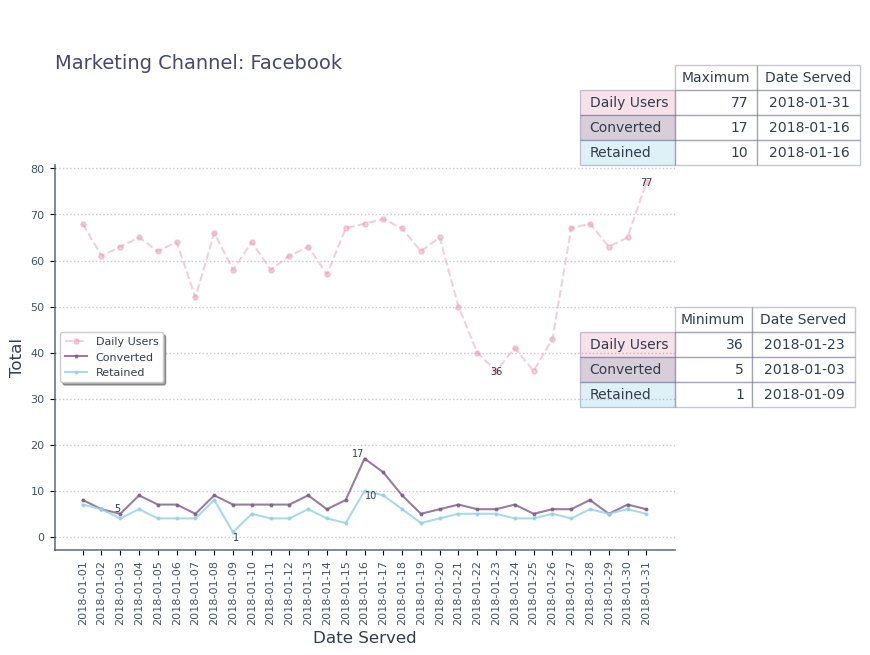

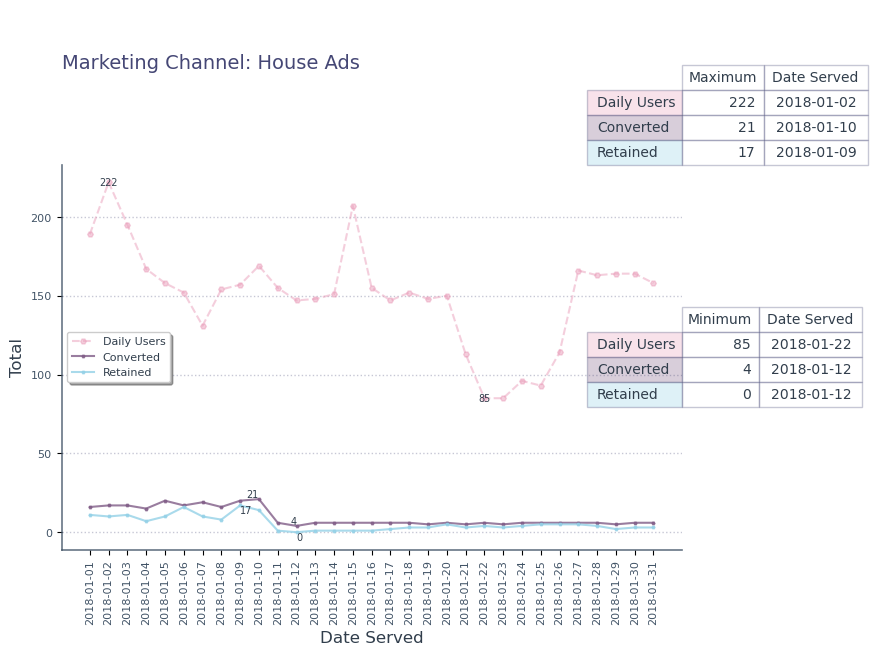

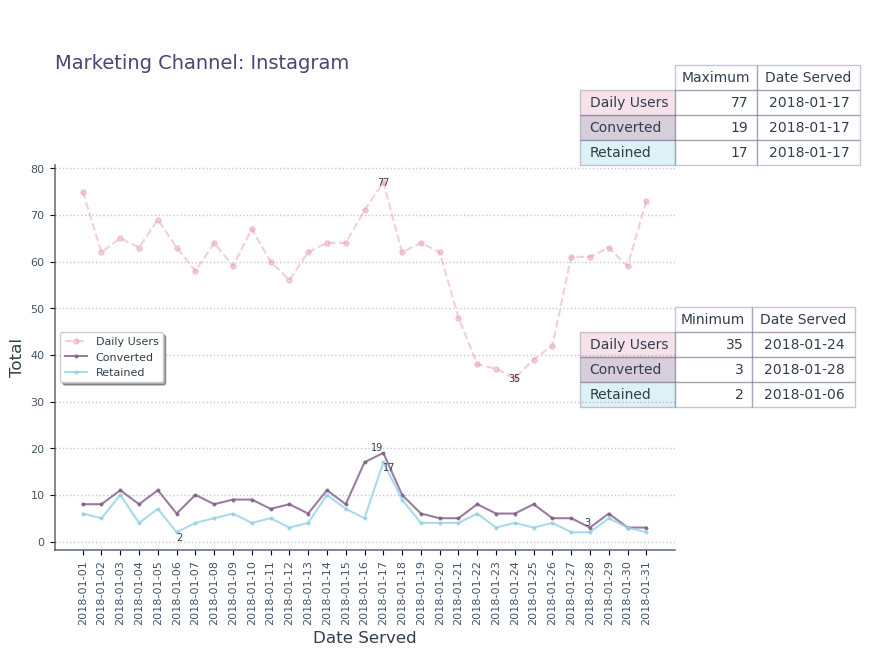

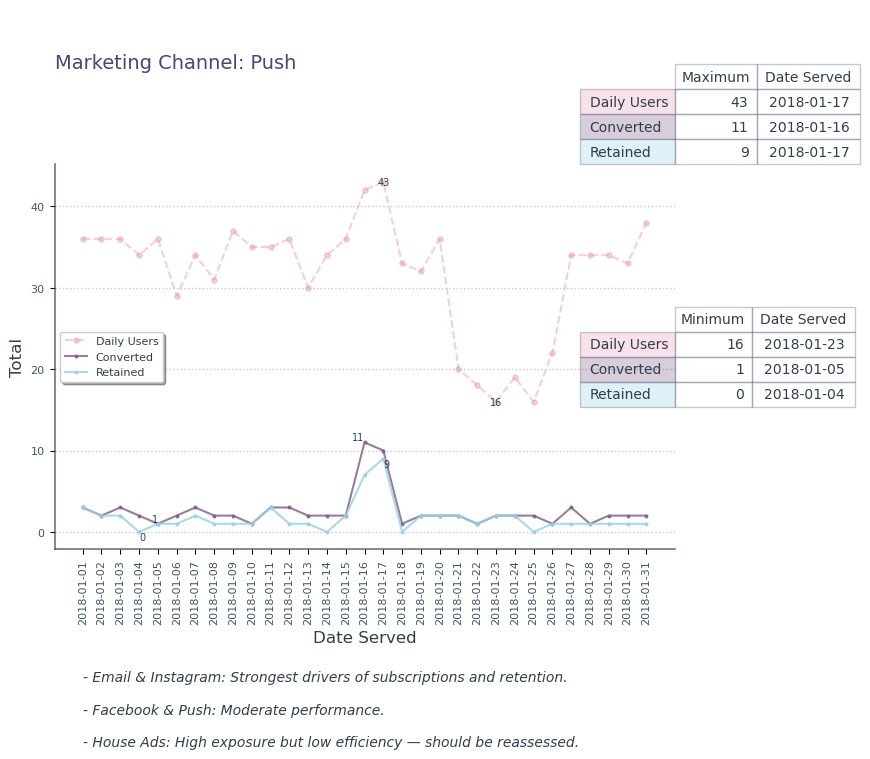

In [582]:
# Visualization: Daily Engagement & Subscription Patterns by Channel: 
#===================================================================# 

f.group_line_plots(marketing,converted_users,retained_users,['date_served','marketing_channel'],'user_id')

# Findings:
text = '''
- Email & Instagram: Strongest drivers of subscriptions and retention.\n
- Facebook & Push: Moderate performance.\n
- House Ads: High exposure but low efficiency — should be reassessed.'''

plt.text(0, -15, text, ha = 'left', va = 'top' , fontstyle = 'italic', fontsize = 10, color = '#313E4C');

<br>

### $\color{#454775}{Q7:}$ ***What patterns emerge in daily engagements among different age groups?***


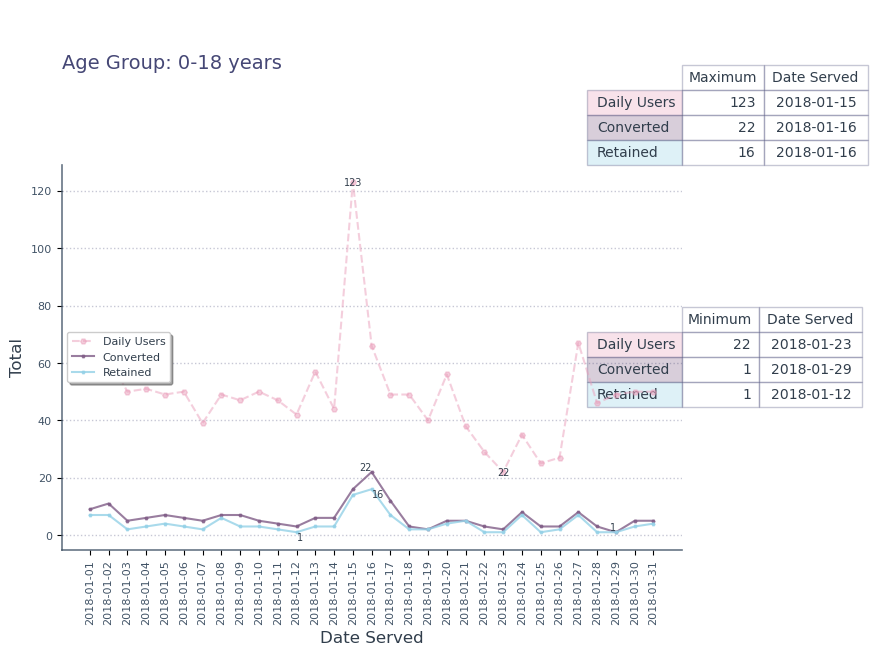

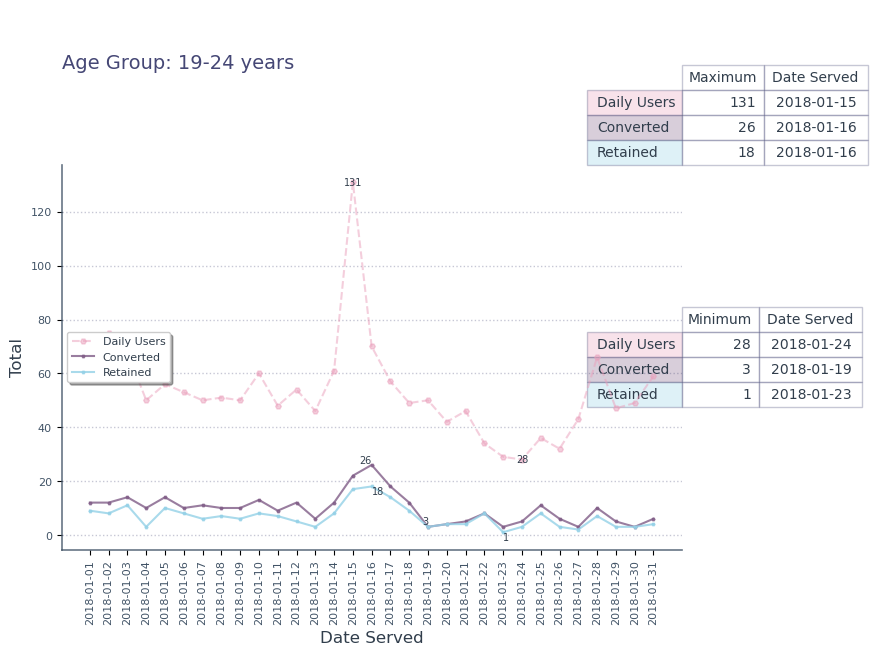

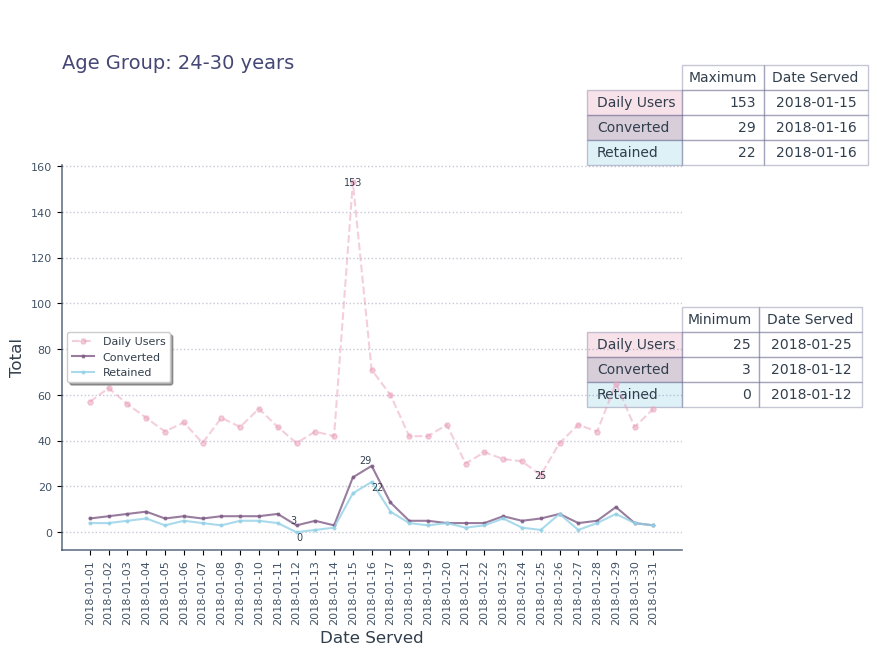

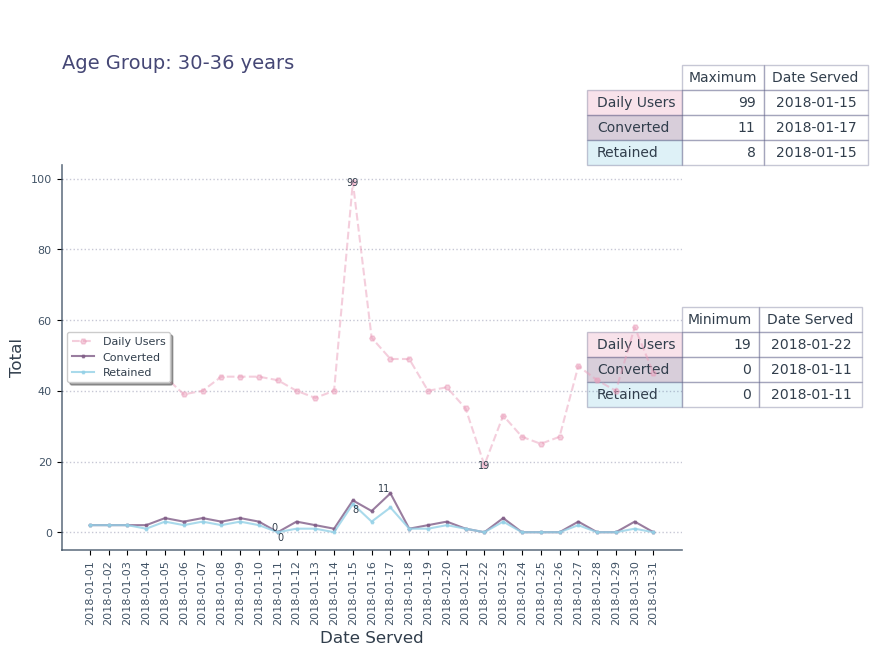

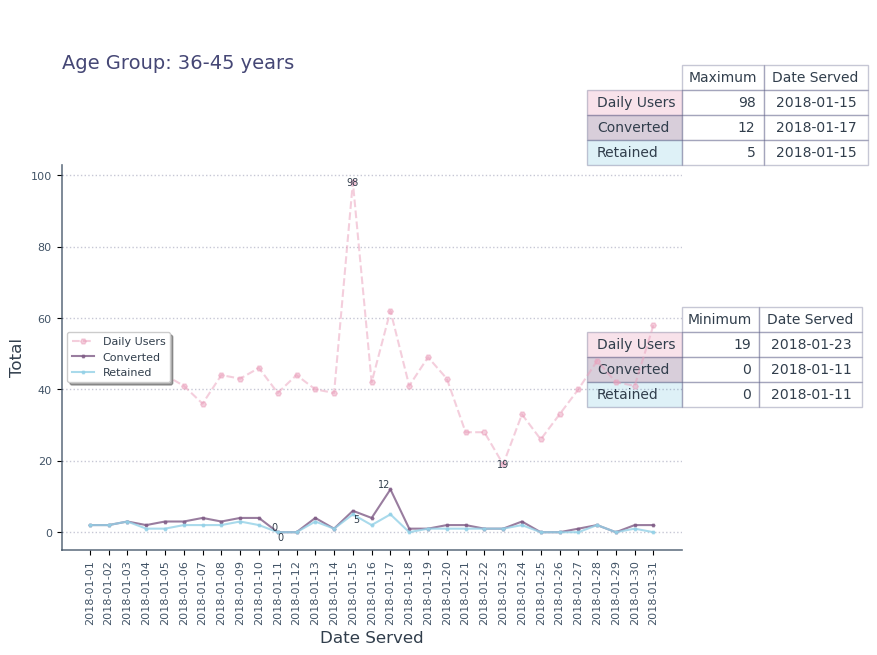

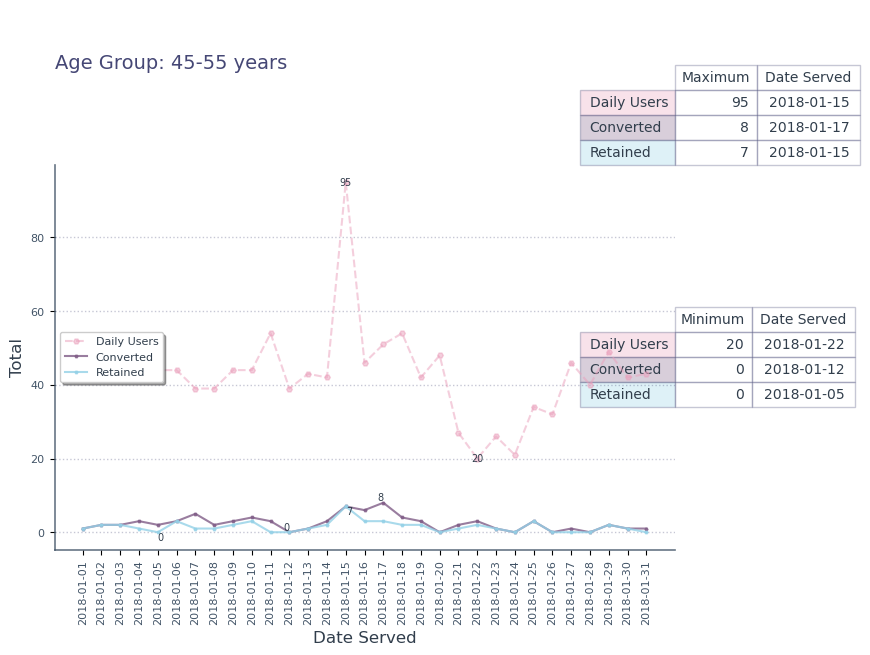

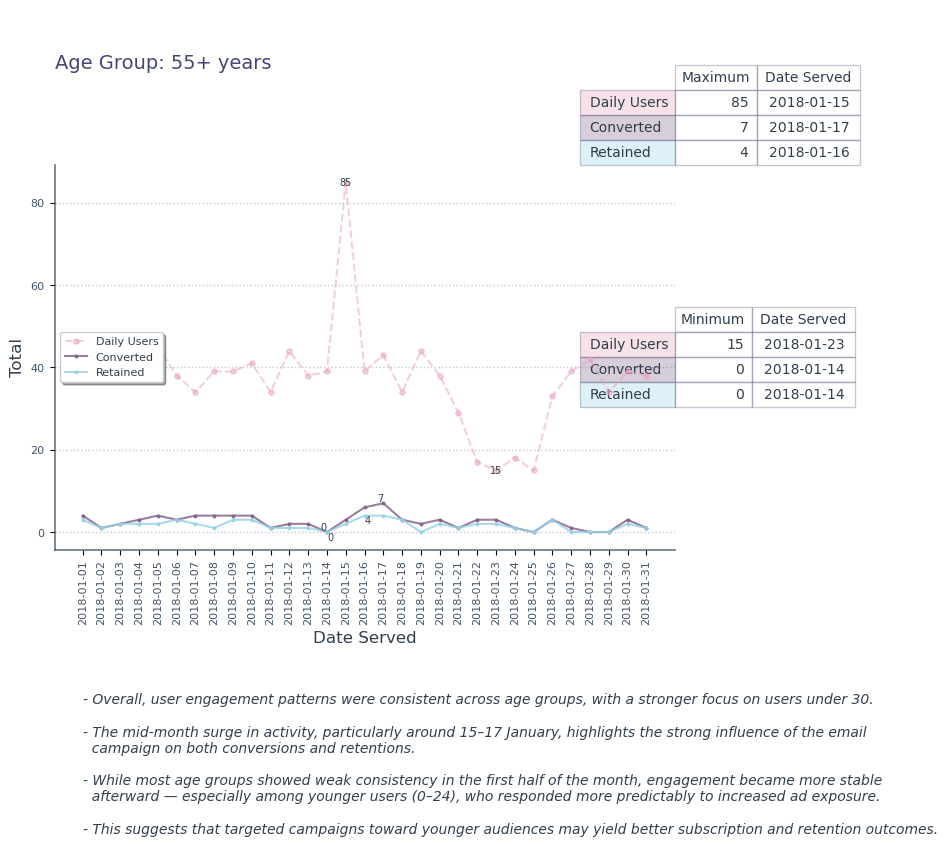

In [583]:
# Visualization: Daily Engagement & Subscription Patterns by Age Group:
#=====================================================================#

f.group_line_plots(marketing, converted_users, retained_users, ['date_served', 'age_group'], 'user_id')

# Findings:
text_ch_a = '''
- Overall, user engagement patterns were consistent across age groups, with a stronger focus on users under 30. \n
- The mid-month surge in activity, particularly around 15–17 January, highlights the strong influence of the email 
  campaign on both conversions and retentions. \n
- While most age groups showed weak consistency in the first half of the month, engagement became more stable 
  afterward — especially among younger users (0–24), who responded more predictably to increased ad exposure. \n
- This suggests that targeted campaigns toward younger audiences may yield better subscription and retention outcomes.'''

plt.text(0, -35, text_ch_a, ha = 'left', va = 'top', fontstyle = 'italic', fontsize = 10, color = '#313E4C');

<br>

### $\color{#454775}{Q8:}$ ***How do interactions during the weekdays influence subscription counts across different marketing channels?***


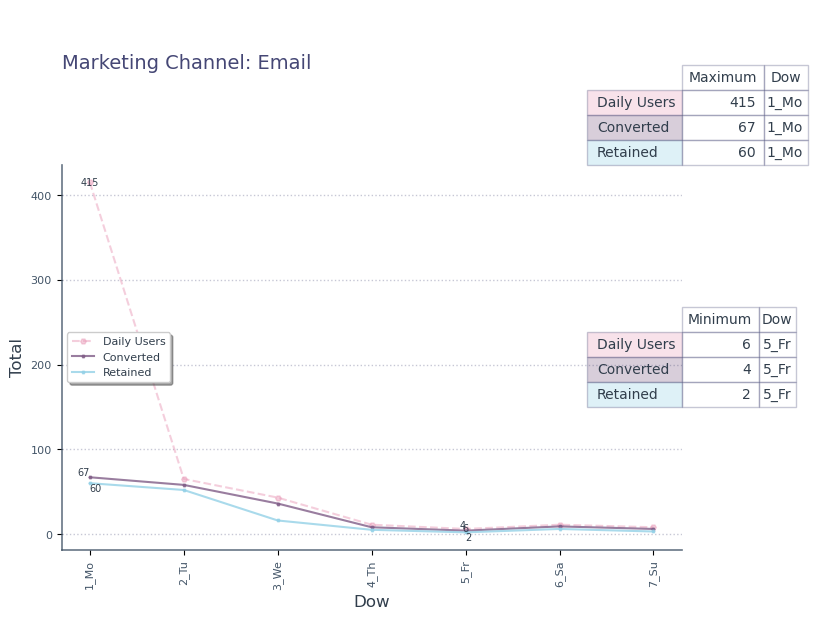

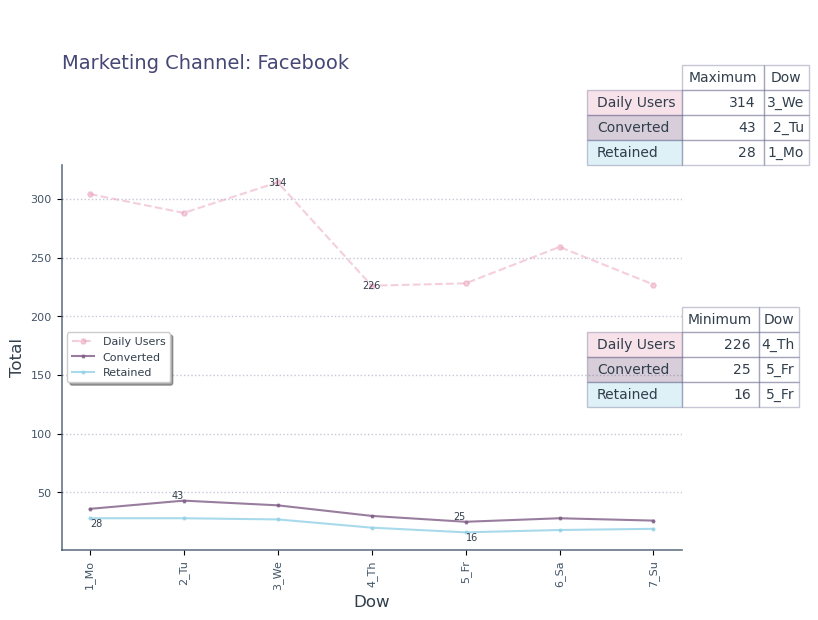

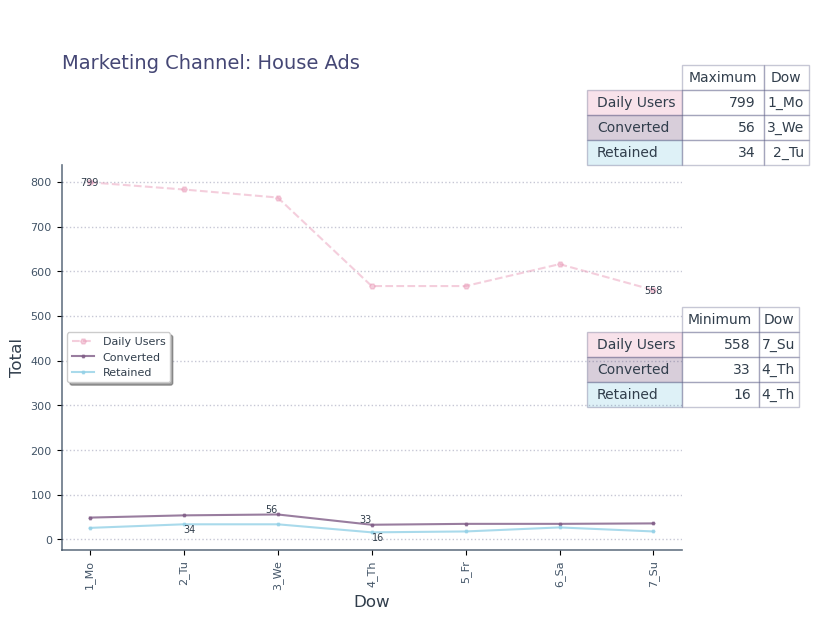

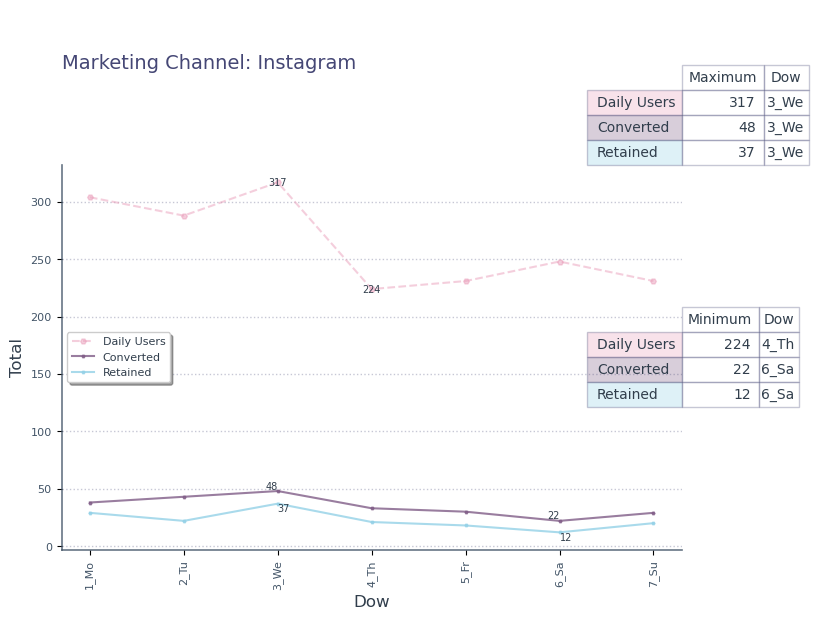

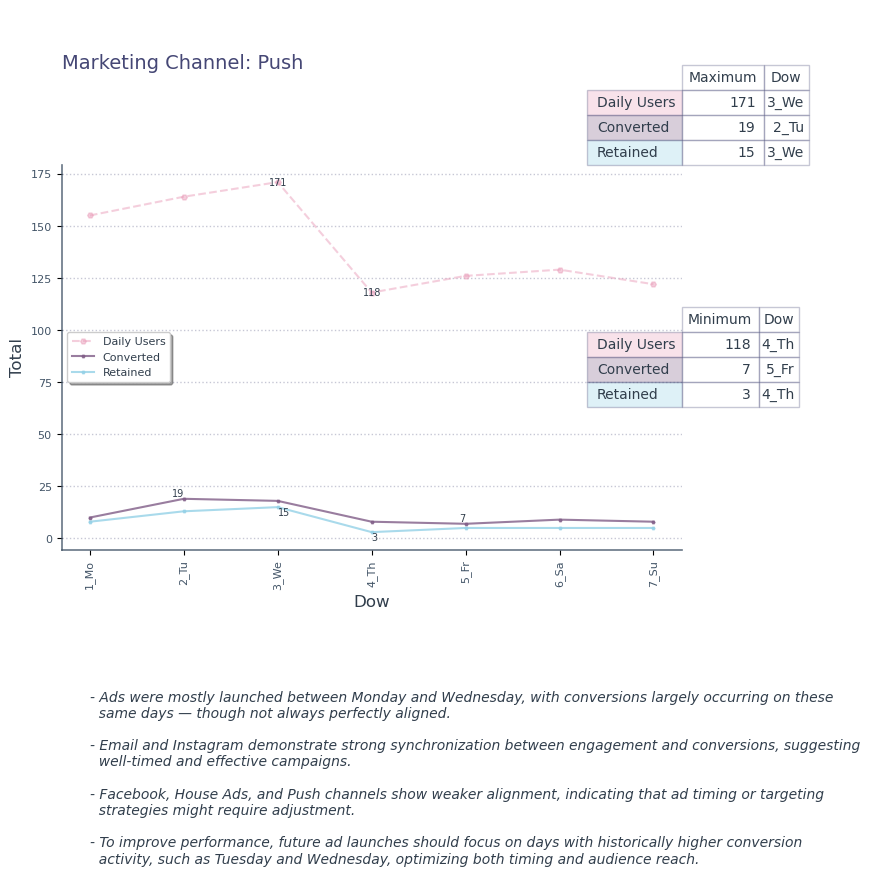

In [584]:
# Visualization: Daily Engagement & Subscription Patterns by Weekdays:
#====================================================================#

f.group_line_plots(marketing, converted_users, retained_users, ['dow', 'marketing_channel'], 'user_id')

# Findings
text_dow = '''
- Ads were mostly launched between Monday and Wednesday, with conversions largely occurring on these 
  same days — though not always perfectly aligned.\n
- Email and Instagram demonstrate strong synchronization between engagement and conversions, suggesting 
  well-timed and effective campaigns.\n
- Facebook, House Ads, and Push channels show weaker alignment, indicating that ad timing or targeting 
  strategies might require adjustment.\n
- To improve performance, future ad launches should focus on days with historically higher conversion 
  activity, such as Tuesday and Wednesday, optimizing both timing and audience reach.'''

plt.text(0, -65 ,text_dow , ha = 'left', va = 'top', fontstyle = 'italic', fontsize = 10, color = '#313E4C');

<br>

### $\color{#454775}{\sf House\;Ads\;Indepth\;Analysis:}$
### $\color{#454775}{Q8:}$ ***What is the impact of Language mismatches on conversions via House Ads?***


In [442]:
# Creating the targeted DataFrame: 
house_ads= marketing.query('marketing_channel=="House Ads"')

# Conversted users via house ads:
house_ads_converted= house_ads.query('converted == True') 

# house ads record with mismatched languages 
lang_mismatch_house_ads=house_ads.query('status == "mismatched_language"')

# Daily converted users via house ads 
daily_users = house_ads_converted.groupby('date_served').converted.count().reset_index().fillna(0).rename(columns={'converted':'# converted'})

# Daily Language mismatches via house ads 
daily_mismatches = lang_mismatch_house_ads.groupby('date_served').status.count().reset_index().fillna(0).rename(columns={'status':'# mismatch_occurance'})
# Merging
house_ad_pattern = daily_users.merge(daily_mismatches,how='left',on='date_served').fillna(0)

# Customization
house_ad_pattern.columns = [x.replace('_', ' ').title() for x in house_ad_pattern.columns]

house_ad_pattern['# Mismatch Occurance']= house_ad_pattern['# Mismatch Occurance'].astype('int64')

In [443]:
# Creating a line chart function
def two_lines (df,col1,col2,col3): 
    # Data
    x= df[col1].astype('str').to_list()
    y= df[col2]
    z= df[col3]
    
    # Creating the Chart
    fig,ax =plt.subplots(figsize = (8,5))
    
    ax.plot(x,y,color='#805D87', marker = 'H', markersize=2, alpha=.8,label=df.columns[1])
    
    ax.plot(x,z,color='#EA9FBB', marker = 'H', markersize=4, alpha=.5,ls="--",label=house_ad_pattern.columns[2]);

    # Chart Customization
    plt.title('',fontsize=14,color='#454775',loc='left')

    plt.xlabel(df.columns[0],fontsize=12,color='#313E4C')
    plt.xticks(rotation=90,fontsize=8,color='#415366')

    plt.ylabel('Total',fontsize=12,color='#313E4C')
    plt.yticks(fontsize=8,color='#415366')

    plt.grid(axis='y',linestyle=":", color='#454775',linewidth=1,alpha=.3)
        
    plt.legend(fontsize=8,labelcolor='#313E4C',loc='upper right',fancybox=True, shadow=True,)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_edgecolor('#415366')
        spine.set_alpha(.8)
    
    # Anotating Values on Chart
    for i,v in enumerate(y): 
        plt.text(i,v,v,ha='center', va='bottom',fontsize=7,color='#313E4C')
    
    for i,v in enumerate(z): 
        plt.text(i,v,v,ha='center', va='top',fontsize=7,color='#313E4C')


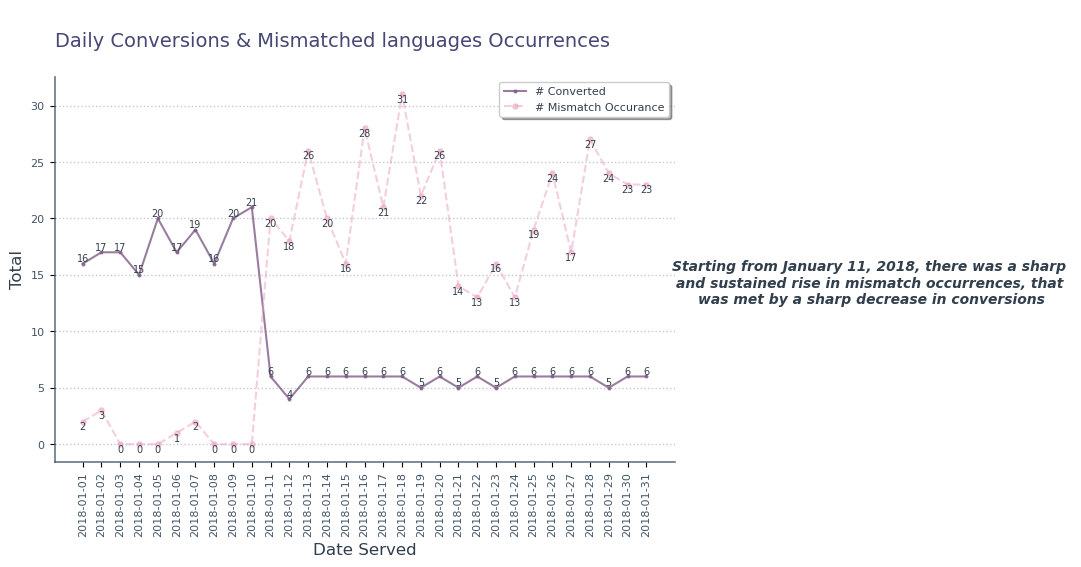

In [444]:
# Visualization- Daily Conversions & Mismatched languages Occurrences
two_lines(house_ad_pattern,'Date Served','# Converted','# Mismatch Occurance')

# Additional Customization
plt.title('\nDaily Conversions & Mismatched languages Occurrences\n',fontsize=14,color='#454775',loc='left')

# Findings
text_mismatch = ''' 
Starting from January 11, 2018, there was a sharp 
and sustained rise in mismatch occurrences, that 
was met by a sharp decrease in conversions'''

plt.text(42,15,text_mismatch,ha='center',va='center',weight='semibold',fontstyle='italic', fontsize=10, color='#313E4C');

<br>

### $\color{#454775}{Q8:}$ ***How does the conversion might look like if there had been no issues (The Language Bug)?***
#### $\color{#454775}{-}$ *Steps:*
$\color{#454775}{1.}$ Establish a baseline period (01–10 January 2018) — when ads were primarily served in the correct language.<br>
$\color{#454775}{2.}$ Calculate Conversion Rates Across displayed language within the above period<br>
$\color{#454775}{3.}$ Indexing the non-English conversion rates to English tounderstand how well each language typically performs compared to English.<br>
$\color{#454775}{4.}$ Compute the dialy users and conversion counts across preferred language<br>
   > $\color{#454775}{Note:}$ <br>
   > _The result should be a DataFrame with the number of users who should have seen ads in each language and how many of those users converted each day._<br><br>

$\color{#454775}{5.}$ Create English conversion rate column where the language bug was a problem (after 10-01-2018).<br>
$\color{#454775}{6.}$ Multiply English conversion rates by other languages' index to calculate their estimated conversion rates.


In [445]:
# Calculate pre-error conversions
#Establish a baseline period (01–10 January 2018)
# house_ads DataFram prior bug
house_ads_no_bug=house_ads[house_ads['date_served']<'2018-01-11']

# converted house_ads DataFram prior bug
house_ads_no_bug_con = house_ads_no_bug.query('converted==True')

# Calculating the conversion rate via language displayed
no_bug_conversions= con_ret(house_ads_no_bug,house_ads_no_bug_con,'language_displayed','user_id').iloc[:,[0,3]].set_index('Language Displayed').rename(columns={'Rate':'Conversion Rate'})

# Indexing other language against English
no_bug_conversions['Idx']= no_bug_conversions['Conversion Rate']/no_bug_conversions.loc["English"][0]

no_bug_conversions

Conversion Rate       Idx
Language Displayed                           
Arabic                       0.5000  5.112474
German                       0.4615  4.718814
Spanish                      0.1667  1.704499
English                      0.0978  1.000000

> $\color{#454775}{Note:}$
> - _Arabic speakers convert at about 5.1 times the rate compared to English-speakers._
> - _German speakers convert at about 4.7 times the rate compared to English-speakers._
> - _Spanish-speaking users typically convert about 1.7 times the rate of English-speakers_


In [446]:
# Claculate the daily actual conversion via preferred language 
lang_conversion= house_ads.groupby(['date_served','language_preferred'])\
                          .agg({'user_id':'nunique','converted':'sum'})\
                          .unstack(level=1).fillna(0)

lang_conversion=lang_conversion.astype('int64')

In [447]:
# Create English conversion rate column for the affected period 
affected_lang_con = lang_conversion.loc['2018-01-11':,[('user_id','English'),('converted','English')]]\
                                          .rename(columns={'user_id':'Total Users','converted':'Converted','English':'English_Actual'})

# Calculate The actual conversion rate (for English - preferred) within the affected period
affected_lang_con[('Conversion Rate','English_Actual')]= affected_lang_con.iloc[:,1]/affected_lang_con.iloc[:,0]

# Multiplying the actual English conversion rate by the index of each language 
affected_lang_con[('Conversion Rate','Arabic_Estimated')] = affected_lang_con[('Conversion Rate','English_Actual')]*(no_bug_conversions.loc['Arabic'][1])
affected_lang_con[('Conversion Rate','German_Estimated')] = affected_lang_con[('Conversion Rate','English_Actual')]*no_bug_conversions.loc['German'][1]
affected_lang_con[('Conversion Rate','Spanish_Estimated')] = affected_lang_con[('Conversion Rate','English_Actual')]*no_bug_conversions.loc['Spanish'][1]

In [448]:
# Calculate the actual conversion rate for preferred languages other than English for the affected period 
actual_conversion_rates = lang_conversion.iloc[10:,0:]

actual_conversion_rates[('Conversion Rate','Arabic_Actual')]=actual_conversion_rates.iloc[:,4]/actual_conversion_rates.iloc[:,0]
actual_conversion_rates[('Conversion Rate','German_Actual')]=actual_conversion_rates.iloc[:,6]/actual_conversion_rates.iloc[:,2]
actual_conversion_rates[('Conversion Rate','Spanish_Actual')]=actual_conversion_rates.iloc[:,7]/actual_conversion_rates.iloc[:,3]

actual_conversion_rates= actual_conversion_rates.loc[:,('Conversion Rate','Arabic_Actual'):]

In [449]:
# Extract the Estimated conversion rate for preferred languages other than English for the affected period 
estimated_conversion_rates = affected_lang_con.iloc[:,3:]

In [450]:
# Merging the two datasets
lang_comparison = actual_conversion_rates.merge(estimated_conversion_rates, how='left', on='date_served').reset_index()
lang_comparison.head()

date_served Conversion Rate                               \
language_preferred               Arabic_Actual German_Actual Spanish_Actual   
0                   2018-01-11             0.0           0.0       0.000000   
1                   2018-01-12             0.0           0.0       0.090909   
2                   2018-01-13             0.0           0.2       0.000000   
3                   2018-01-14             0.0           0.0       0.000000   
4                   2018-01-15             0.0           0.0       0.000000   

                                                                        
language_preferred Arabic_Estimated German_Estimated Spanish_Estimated  
0                          0.230638         0.212879          0.076895  
1                          0.118895         0.109740          0.039640  
2                          0.211259         0.194992          0.070434  
3                          0.234159         0.216129          0.078069  
4                          0.160601         0.148235          0.053544

In [451]:
# Calculate the lost expected subscribers 
# Merge tables
lang_conversion_affected = lang_conversion.iloc[10:,0:]
lang_conversion_affected=lang_conversion_affected.merge(lang_comparison.set_index('date_served'),how='left',on='date_served')
lang_conversion_affected=lang_conversion_affected.iloc[:,[0,2,3,4,5,6,7,11,12,13]]

# Claculted the expected number of converted subscribers for Non-English Languages
lang_conversion_affected[('estimated converted','Arabic')]= (lang_conversion_affected.loc[:,('Conversion Rate','Arabic_Estimated')]*(lang_conversion_affected[('user_id','Arabic')]))
lang_conversion_affected[('estimated converted','German')]= lang_conversion_affected.loc[:,('Conversion Rate','German_Estimated')]*lang_conversion_affected[('user_id','German')]
lang_conversion_affected[('estimated converted','Spanish')]= lang_conversion_affected.loc[:,('Conversion Rate','Spanish_Estimated')]*lang_conversion_affected[('user_id','Spanish')]

lang_conversion_affected.head()

user_id                converted                         \
language_preferred  Arabic German Spanish    Arabic English German Spanish   
date_served                                                                  
2018-01-11               7      2      13         0       6      0       0   
2018-01-12               3      4      11         0       3      0       1   
2018-01-13               6      5      16         0       5      1       0   
2018-01-14               5      3      12         0       6      0       0   
2018-01-15               2      4      10         0       6      0       0   

                    Conversion Rate                                     \
language_preferred Arabic_Estimated German_Estimated Spanish_Estimated   
date_served                                                              
2018-01-11                 0.230638         0.212879          0.076895   
2018-01-12                 0.118895         0.109740          0.039640   
2018-01-13                 0.211259         0.194992          0.070434   
2018-01-14                 0.234159         0.216129          0.078069   
2018-01-15                 0.160601         0.148235          0.053544   

                   estimated converted                      
language_preferred              Arabic    German   Spanish  
date_served                                                 
2018-01-11                    1.614466  0.425758  0.999631  
2018-01-12                    0.356684  0.438959  0.436035  
2018-01-13                    1.267556  0.974962  1.126941  
2018-01-14                    1.170796  0.648387  0.936824  
2018-01-15                    0.321203  0.592940  0.535445

In [452]:
# expected lost subscribers Function
def lost_sub(df1,df2):
    estimated_con = df1.sum().sum()
    actual_con=df2.sum().sum()
    expected_lost=estimated_con - actual_con 
    return np.ceil(expected_lost)

In [453]:
# Calculate The expected lost subscribers
expected_lost_subscribers = lost_sub(lang_conversion_affected.iloc[:,10:],lang_conversion_affected.iloc[:,[3,5,6]].sum().sum())
ar_expected_lost_sub = lost_sub(lang_conversion_affected.iloc[:,10],lang_conversion_affected.iloc[:,3].sum().sum())
gr_expected_lost_sub = lost_sub(lang_conversion_affected.iloc[:,11],lang_conversion_affected.iloc[:,5].sum().sum())
sp_expected_lost_sub = lost_sub(lang_conversion_affected.iloc[:,12],lang_conversion_affected.iloc[:,6].sum().sum())

print(f'''
- The Overall Estimated Lost Subscribers ≈ {expected_lost_subscribers:.0f}\n
- The Estimated Lost Subscribers - Arabic ≈ {ar_expected_lost_sub:.0f}\n
- The Estimated Lost Subscribers - German ≈ {gr_expected_lost_sub:.0f}\n
- The Estimated Lost Subscribers - Spanish ≈ {sp_expected_lost_sub:.0f}\n''')


- The Overall Estimated Lost Subscribers ≈ 26

- The Estimated Lost Subscribers - Arabic ≈ 12

- The Estimated Lost Subscribers - German ≈ 10

- The Estimated Lost Subscribers - Spanish ≈ 6



In [454]:
# Creating a line chart function
def two_lines_pct (df,col1,col2,col3): 
    # Data
    x= df[col1].astype('str').to_list()
    y= df[col2]
    z= df[col3]
    
    # Creating the Chart
    fig,ax =plt.subplots(figsize = (8,5))
    
    ax.plot(x,y,color='#805D87', marker = 'H', markersize=2, alpha=.5,label=col2[1])
    
    ax.plot(x,z,color='#EA9FBB', marker = 'H', markersize=4, alpha=.8,ls="--",label=col3[1]);

    # Chart Customization
    plt.title('\n\n Actual vs. Estimated Conversion Rates - '+ col2[1].replace('_Actual','')+'\n',fontsize=14,color='#454775',loc='left')

    plt.xlabel(col1.title().replace('_',' '),fontsize=12,color='#313E4C')
    plt.xticks(rotation=90,fontsize=8,color='#415366')

    plt.ylabel('Total',fontsize=12,color='#313E4C')
    plt.yticks(fontsize=8,color='#415366')

    plt.grid(axis='y',linestyle=":", color='#454775',linewidth=1,alpha=.3)
        
    plt.legend(fontsize=8,labelcolor='#313E4C',loc='upper right',fancybox=True, shadow=True,)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_edgecolor('#415366')
        spine.set_alpha(.8)
    
    # Anotating Values on Chart
    for i,v in enumerate(y): 
        plt.text(i,v,f'{v:.0%}',ha='center', va='bottom',fontsize=7,color='#313E4C')
    
    for i,v in enumerate(z): 
        plt.text(i,v,f'{v:.0%}',ha='center', va='top',fontsize=7,color='#313E4C')


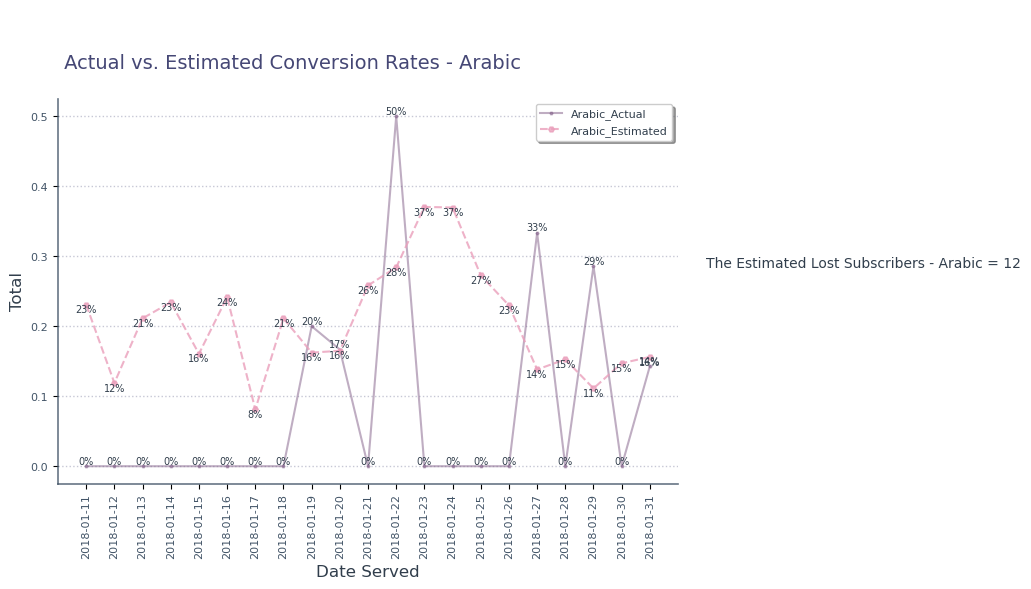

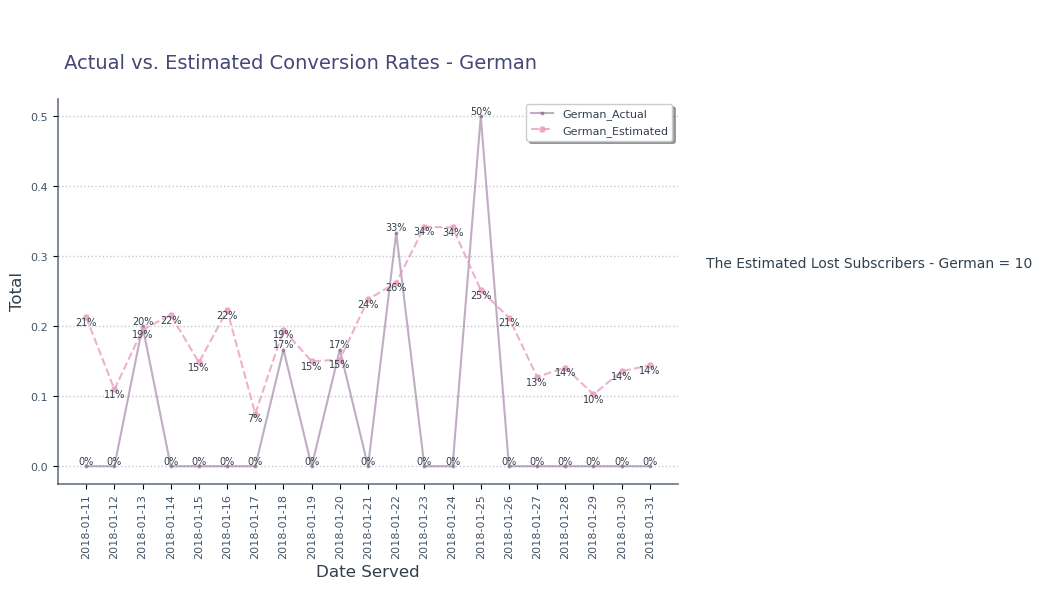

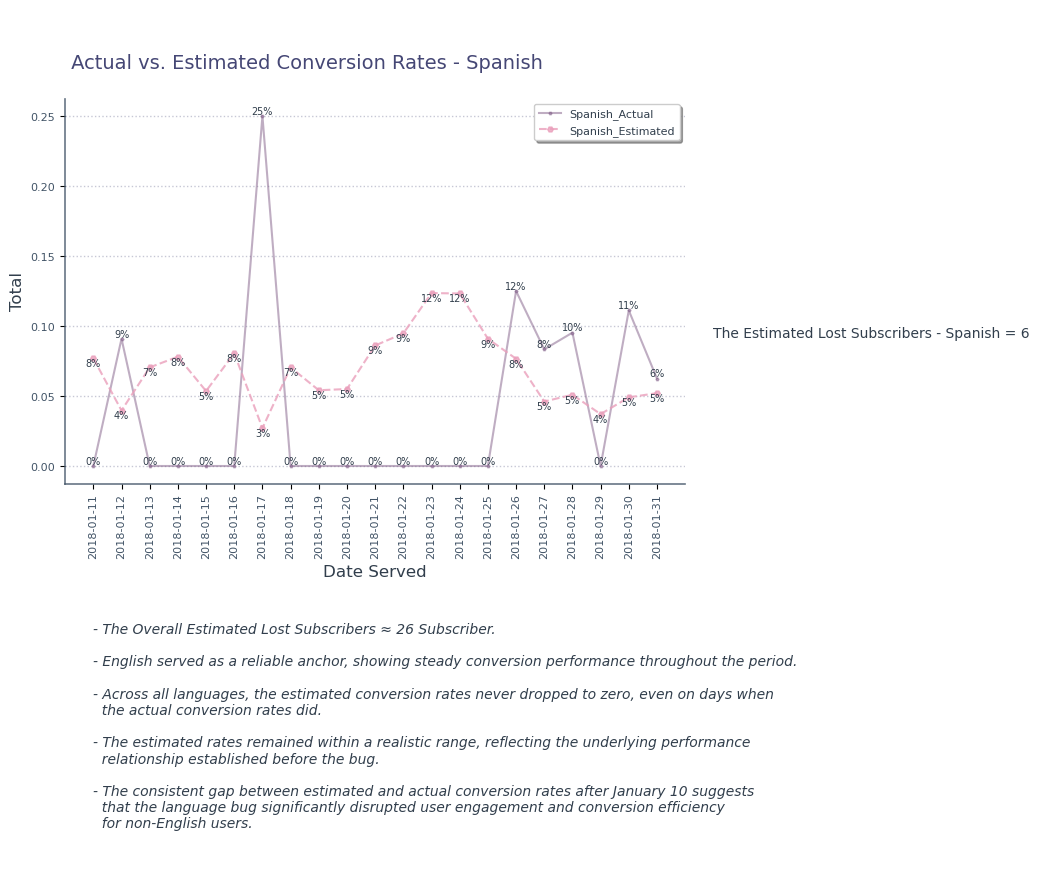

In [455]:
# Visualization - Actual vs. Estimated Converstion Rates 
# 1- Arabic
two_lines_pct(lang_comparison,'date_served',('Conversion Rate','Arabic_Actual'),('Conversion Rate','Arabic_Estimated'))

# Additional Customazation
text_ar = f'The Estimated Lost Subscribers - Arabic = {ar_expected_lost_sub:.0f}'
plt.text(22,.3,text_ar,ha='left',va='top', color='#313E4C')

# 2- German
two_lines_pct(lang_comparison,'date_served',('Conversion Rate','German_Actual'),('Conversion Rate','German_Estimated'))

# Additional Customazation
text_gr=f'The Estimated Lost Subscribers - German = {gr_expected_lost_sub:.0f}'
plt.text(22,.3,text_gr,ha='left',va='top', color='#313E4C')

# 3- Spanish
two_lines_pct(lang_comparison,'date_served',('Conversion Rate','Spanish_Actual'),('Conversion Rate','Spanish_Estimated'))

# Additional Customazation
text_sp=f'The Estimated Lost Subscribers - Spanish = {sp_expected_lost_sub:.0f}'
plt.text(22,.1,text_sp,ha='left',va='top', color='#313E4C')

# Findings
text_comparison=f''' 
- The Overall Estimated Lost Subscribers ≈ {expected_lost_subscribers:.0f} Subscriber.\n
- English served as a reliable anchor, showing steady conversion performance throughout the period.\n
- Across all languages, the estimated conversion rates never dropped to zero, even on days when 
  the actual conversion rates did. \n
- The estimated rates remained within a realistic range, reflecting the underlying performance 
  relationship established before the bug.\n
- The consistent gap between estimated and actual conversion rates after January 10 suggests 
  that the language bug significantly disrupted user engagement and conversion efficiency 
  for non-English users.\n
'''

plt.text(0,-.1,text_comparison,ha='left',va='top',fontstyle='italic', fontsize=10, color='#313E4C');

<br>

### $\color{#454775}{\sf A/B\;Testing:}$
### $\color{#454775}{Q8:}$ ***With Email showing promising outcomes, how could personalized ads further improve conversion rates?***


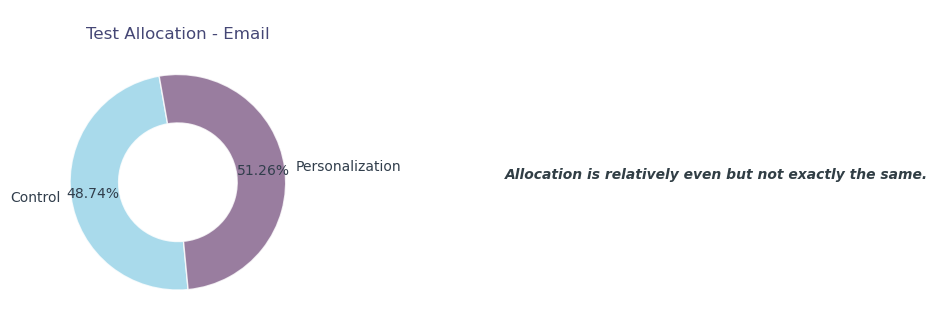

In [456]:
# Create the email DataFrame: 
email=marketing.query('marketing_channel=="Email"')
allocation =email.groupby('variant').user_id.nunique().reset_index().rename(columns={'user_id':'# Users'})

# Visualization - Test Allocation - Email 
pie_plot(allocation,'# Users','variant') 

# Additional Customization 
plt.title('\nTest Allocation - Email')

# Findings: 
text_allocation = '''
Allocation is relatively even but not exactly the same.'''
plt.text(5,0,text_allocation,ha='center',va='bottom',fontsize = 10, weight = 'semibold',fontstyle='italic',color='#313E45');

In [457]:
# Create Confidence Interval Range Function: 
def ci_range(df,col1,col2,target):
    total = df[col1].sum()
    group = df[df[col2]== target].iloc[0,1]
    pct = group/total
    p0=.5
    se= math.sqrt(pct*(1-pct)/total)
    ci =(pct - 1.96 * se, pct + 1.96 * se)
    
    # Checking: 
    if ci[0]<= pct <= ci[1]: 
        result = f'''The 95% Confidence Interval for the {target.title()} Group shows that:\n
    - No Evidence of Systematic Imbalance.\n
    - The {target.title()} Group is within the Confidence Interval Range of {ci[0]:.2%} & {ci[1]:.2%}\n'''
    else: 
        result = '\n- Allocation has gone Wrong, Recheck your Data\n' 
    
    return result
    
    

In [458]:
# Perform 95% Confidence Interval for the observed proportion (Treatment Group)
print(f"1- {ci_range(allocation,'# Users','variant','personalization')}\n")

# Perform 95% Confidence Interval for the observed proportion (Control Group)
print(f"2- {ci_range(allocation,'# Users','variant','control')}")

1- The 95% Confidence Interval for the Personalization Group shows that:

    - No Evidence of Systematic Imbalance.

    - The Personalization Group is within the Confidence Interval Range of 47.10% & 55.43%


2- The 95% Confidence Interval for the Control Group shows that:

    - No Evidence of Systematic Imbalance.

    - The Control Group is within the Confidence Interval Range of 44.57% & 52.90%



In [459]:
# Ensuring that each user and variant has only one subscription outcome
subs= email.groupby(['user_id','variant']).converted.max().unstack(level=1)

In [460]:
# Calculate the Conversion Rate of the control & ppersonalization group 
con_rate= subs.agg({'control':np.mean,'personalization':np.mean}).reset_index()

# Calculate Lift:
con_rate.columns=['Variant','Conversion Rate']
con_var_email = con_rate.set_index('Variant')
c_mean =con_var_email.loc['control','Conversion Rate']
p_mean =con_var_email.loc['personalization','Conversion Rate']
lift = (p_mean-c_mean)/c_mean

In [461]:
# Perform t-test to ensure that the observed differences are not due to random chance
# Creating control DataFrame & dropping its Nulls (to only include conversion outcomes for all users in each variant)
c_df = subs.control.dropna().reset_index() 

# Creating personalization DataFrame & dropping its Nulls (to only include conversion outcomes for all users in each variant)
p_df= subs.personalization.dropna().reset_index()
t = stats.ttest_ind(c_df['control'],p_df['personalization']) 

In [462]:
# Create a DataFrame to include the above results
# Append results
email_stats =[]
email_stats.append({
        'Channel': 'Email',
        'Control CR': c_mean,
        'Personalization CR': p_mean,
        'Lift': lift,
        'P-value': t[1],
        'SE': t[0],
        'Result': "Statistically Significant" if t[1]<= 0.05 else "Not Statistically Significant"
    })
email_stats_df = pd.DataFrame(email_stats)
email_stats_df.style.hide().format({'Control CR':'{:,.2%}','Personalization CR':'{:,.2%}','Lift':'{:,.2%}','P-value':'{:,.2%}','SE':'{:,.2f}'})

In [463]:
# Create a DataFrame to include the above results
email_stats ={'Data':['Channel','Control CR','Personalization CR','Lift','P-value','SE','Significane'], 
            'Result':['Email',f'{c_mean:.2%}',f'{p_mean:.2%}',f'{lift:.2%}',f'{t[1]:.2%}',f'{t[0]:.2f}',"Statistically Significant" if t[1]<= 0.05 else "Not Statistically Significant"]}
email_stats_df = pd.DataFrame(email_stats)

email_stats_df=email_stats_df.set_index('Data')

email_stats_df

Result
Data                                         
Channel                                 Email
Control CR                             28.15%
Personalization CR                     39.08%
Lift                                   38.85%
P-value                                 0.65%
SE                                      -2.73
Significane         Statistically Significant

In [464]:
# 4-Building a Function for Bar Plots: 
def bar_plot (df,col1_name,col2_name):
    # Data
    x= df[col1_name].apply(lambda x: x.title()).to_list()
    y=df[col2_name]

    # Define bar colors based on performance
    colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y]

    # Create the bar chart
    fig, ax= plt.subplots(figsize=(4,4))
    ax.bar(x,y,.3,color=colors, alpha=.8)

    # Customizing Chart
    plt.title('',fontsize=12,color='#454775')

    plt.xlabel(col1_name,fontsize=10,color='#313E4C')
    plt.xticks(fontsize=8, color='#415366')

    plt.ylabel(col2_name,fontsize=10,color='#313E4C')
    plt.yticks(fontsize=8, color='#415366')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_edgecolor('#415366')
        spine.set_alpha(.8) 
        
    # Annotate bars with their values
    for i, v in enumerate(y):
      plt.text(i,v-.03, f"{v:.2%}", ha='center', va='top',fontsize=8,color='#313E4C') 

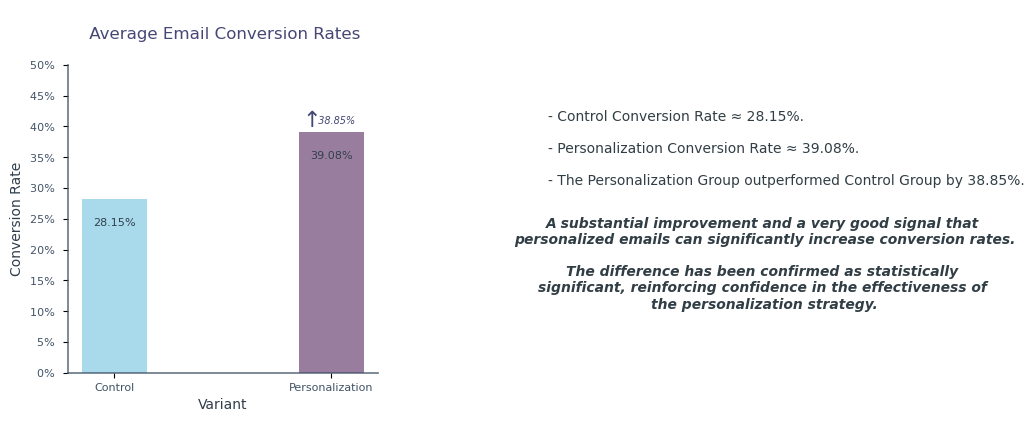

In [465]:
# Visualization - Average Conversion Rates - Emails
bar_plot(con_rate,'Variant','Conversion Rate')

# Additional Customization:
plt.title('\n Average Email Conversion Rates\n')
plt.yticks(np.arange(0,.55,.05),[f'{y:.0%} 'for y in np.arange(0,.55,.05) ])

# Findings: 
text1_e = f''' 
- Control Conversion Rate ≈ {np.mean(c_df.control):.2%}.\n
- Personalization Conversion Rate ≈ {np.mean(p_df.personalization):.2%}.\n 
- The Personalization Group outperformed Control Group by {lift:.2%}.'''

text2_e= ''' 
A substantial improvement and a very good signal that 
personalized emails can significantly increase conversion rates.\n 
The difference has been confirmed as statistically 
significant, reinforcing confidence in the effectiveness of 
the personalization strategy.'''

plt.text(2,.3,text1_e,ha='left',va='bottom',color='#313E45')
plt.text(3,.1,text2_e,ha='center',va='bottom',fontsize = 10, weight = 'semibold',fontstyle='italic',color='#313E45')

arrow = '↑' if lift > 0 else '↓'
color = '#454775' if lift > 0 else '#EA9FBB'
plt.text(.91, .41, f'{arrow}', ha='center', va='center', color=color, fontsize=16)
plt.text(.91, .41, f' {lift: .2%}', ha='left', va='center', color=color, fontsize=7,fontstyle='italic');

<br>

### $\color{#454775}{Q9:}$ ***What impact do demographics have on the effectiveness of personalized ads in achieving higher conversion rates?***
#### $\color{#454775}{1-}$ Language Displayed

In [466]:
# Create a loop Demographics Function
def e_demo (df,col1,col2,target): 
    results = []
    for content in np.unique(df[col2].values): 
        # Isolate the data for only the selected language: 
        data = df[(df[col1]== target) & (df[col2]== content)]
        subs = data.groupby(['user_id','variant']).converted.max().unstack(level=1)
        # Calculating Lift: 
        con_rate= subs.agg({'control':np.mean,'personalization':np.mean}).reset_index()
        con_rate.columns=['Variant','Conversion Rate']
        con_var_e = con_rate.set_index('Variant')
        c_mean =con_var_e.loc['control','Conversion Rate']
        p_mean =con_var_e.loc['personalization','Conversion Rate']
        lift = (p_mean-c_mean)/c_mean

        # Perform Z-Test - to show whether the result is statisctically significant or not:
        # Creating control DataFrame & dropping its Nulls (to only include conversion outcomes for all users in each variant)
        c_df = subs.control.dropna().reset_index() 

        # Creating personalization DataFrame & dropping its Nulls (to only include conversion outcomes for all users in each variant)
        p_df= subs.personalization.dropna().reset_index()
    
        # Number of conversions (successes)
        success = np.array([c_df['control'].sum(), p_df['personalization'].sum()])
        # Sample sizes
        nobs = np.array([len(c_df), len(p_df)])

        z_stat, p_val = proportions_ztest(success, nobs)

        # Append results
        results.append({
            col2.replace('_',' ').title(): content,
            'Control CR': c_mean,
            'Personalization CR': p_mean,
            'Lift': lift,
            'P-value': p_val,
            'SE': z_stat,
            'Result': "Statistically Significant" if p_val<= 0.05 else "Not Statistically Significant"
    })
    return  pd.DataFrame(results).set_index(col2.replace('_',' ').title())

In [467]:
# Creating clustered_bar Function: 
def clustered_bar (df,col2,col3): 
    # Data
    x=np.arange(len(df.index))
    y= df[col2]
    z=df[col3]

    # Creating the Chart:
    fig,ax =  plt.subplots(figsize=(5,5))
    width=.4
    location=x+width/2

    bar1 =ax.bar(x,y,width, label='Personalization CR',color='#805D87')
    bar2=ax.bar(x+width,z,width,label='Control CR',color='#94D1E7')

    # Customizing the Chart:
    plt.title('', fontsize=12, color='#454775')

    plt.xlabel(df.index.name, fontsize=10, color='#313E4c')
    plt.xticks(location, df.index.to_list(), fontsize=8, color='#415366')

    plt.ylabel('Percentage', fontsize=10, color='#313E4c')
    plt.yticks( fontsize=8, color='#415366')

    plt.legend(fontsize=9,labelcolor='#313E4C',fancybox=True, shadow=True,loc='upper right',bbox_to_anchor=(1.5, 1))
    for i, w in enumerate(df['P-value']):
        alpha = 0.8 if w < 0.05 else 0.3
        bar1[i].set_alpha(alpha)
        bar2[i].set_alpha(alpha)

    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_edgecolor('#415366')
        spine.set_alpha(.8)
    
    # Annotating Values to the Chart:
    for i,v in enumerate(y):
        fc = "white" if v<= 0 else "#313E4c"
        plt.text(i,v,f'\n{v:,.0%}', ha='center',va='top', fontsize=7, color=fc)

    for r,s in enumerate(z):
        fc = "white" if s<= 0 else "#313E4c"
        plt.text(r+width,s,f'\n{s:,.0%}', ha='center',va='top', fontsize=7, color=fc)

    for i, val in enumerate(df.Lift):
        arrow = '↑' if val > 0 else '↓'
        color = '#454775' if val > 0 else '#EA9FBB'
        plt.text(x[i] + width/2, y[i] ,arrow,ha='center', va='bottom', color=color, fontsize=16, fontweight='bold')
        plt.text(x[i] + width/2, y[i] , f'{val: .0%}\n\n', ha='center', va='bottom', color=color, fontsize=7,fontstyle='italic');

In [468]:
# Create a DataFrame to include the A/B Test Results
lang= e_demo(marketing,'marketing_channel','language_displayed','Email')
lang.style.format({'Control CR':'{:,.2%}','Personalization CR':'{:,.2%}','Lift':'{:,.2%}','P-value':'{:,.2%}','SE':'{:,.2f}'})

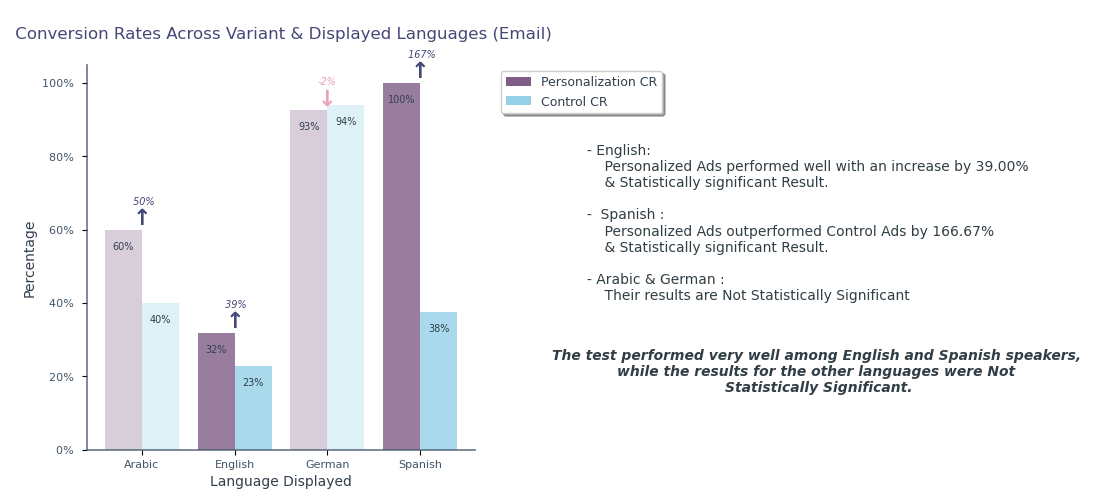

In [469]:
# Visualization - Conversion Rates Across Variant & Displayed Languages (Email)
clustered_bar(lang,'Personalization CR','Control CR')

# Additional Customization: 
plt.title('\n Conversion Rates Across Variant & Displayed Languages (Email)\n')
plt.yticks(np.arange(0,1.1,.2),[f'{y:.0%} 'for y in np.arange(0,1.1,.2) ])

# Findings: 
text1_lang= f''' 
- English: 
    Personalized Ads performed well with an increase by {lang.loc['English','Lift']:.2%} 
    & Statistically significant Result. \n 
-  Spanish : 
    Personalized Ads outperformed Control Ads by {lang.loc['Spanish','Lift']:.2%}
    & Statistically significant Result. \n
- Arabic & German : 
    Their results are Not Statistically Significant'''

text2_lang = ''' 
The test performed very well among English and Spanish speakers, 
while the results for the other languages were Not 
Statistically Significant.'''

plt.text(5,.4,text1_lang,ha='left',va='bottom',color='#313E45')
plt.text(7.5,.15,text2_lang,ha='center',va='bottom',fontsize = 10, weight = 'semibold',fontstyle='italic',color='#313E45');

<br>

#### $\color{#454775}{2-}$ Age Group

In [470]:
# Create a DataFrame to include the A/B Test Results
age= e_demo(marketing,'marketing_channel','age_group','Email')
age.index=[x.replace(' years','') for x in age.index]
age.index.name = 'Age Group'
age.style.format({'Control CR':'{:,.2%}','Personalization CR':'{:,.2%}','Lift':'{:,.2%}','P-value':'{:,.2%}','SE':'{:,.2f}'})

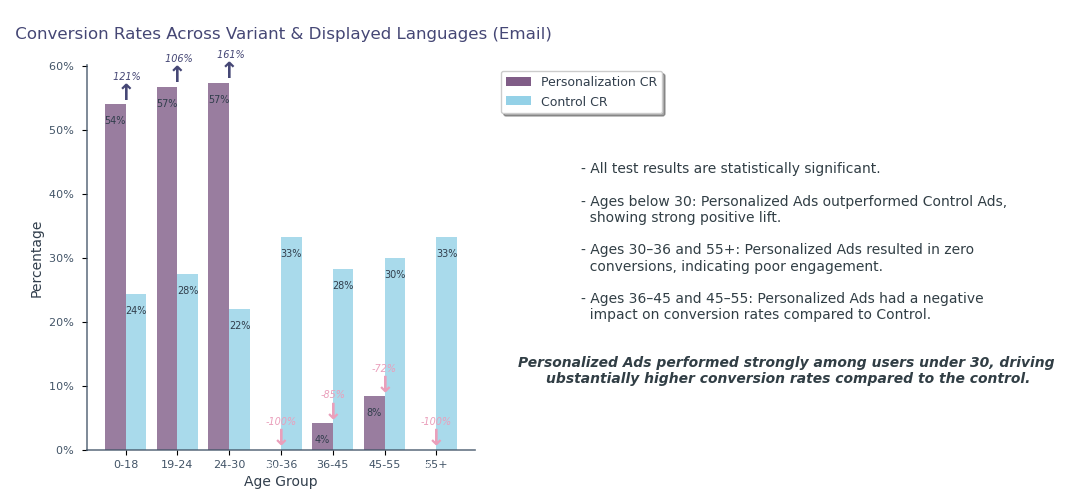

In [471]:
# Visualization - Conversion Rates Across Variant & Displayed Languages (Email)
clustered_bar(age,'Personalization CR','Control CR')

# Additional Customization: 
plt.title('\n Conversion Rates Across Variant & Displayed Languages (Email)\n')
plt.yticks(np.arange(0,.65,.1),[f'{y:.0%} 'for y in np.arange(0,.65,.1) ])

# Findings: 
text1_lang= f''' 
- All test results are statistically significant. \n
- Ages below 30: Personalized Ads outperformed Control Ads, 
  showing strong positive lift. \n
- Ages 30–36 and 55+: Personalized Ads resulted in zero 
  conversions, indicating poor engagement. \n
- Ages 36–45 and 45–55: Personalized Ads had a negative 
  impact on conversion rates compared to Control. '''

text2_lang = ''' 
Personalized Ads performed strongly among users under 30, driving 
ubstantially higher conversion rates compared to the control.'''

plt.text(9,.2,text1_lang,ha='left',va='bottom',color='#313E45')
plt.text(13,.1,text2_lang,ha='center',va='bottom',fontsize = 10, weight = 'semibold',fontstyle='italic',color='#313E45');

<br>


## $\color{#454775}{\bf Data\;Bias\;Consideration}$
***Upon reviewing the conversion and retention metrics, it is evident that several bias factors may be influencing the observed results:***
1. The distribution of users across languages and age groups is highly uneven, with some segments containing very small sample sizes, leading to extreme or unrealistic retention values such as 100% or 0%. In addition, the presence of missing values (NaNs) reduces comparability between categories and introduces uncertainty into trend interpretation.
2. The multi-touch versus single-exposure groups may also include self-selection bias, where more engaged users receive more ad impressions, inflating conversion and retention rates. <br>
***Taken together, these limitations suggest that the current findings should be interpreted with caution, as the results may not fully reflect the true performance across the broader user population.***

### $\color{#454775}{\sf Rcommendation:}$
- To improve reliability and reduce bias in future analyses, it is recommended to ensure balanced sample sizes across demographic segments and apply randomization techniques when assigning ad types and exposure levels.
- Additionally, incorporating statistical validation methods such as confidence intervals, cohort filtering, and weighted averages can help stabilize rate fluctuations and provide a more accurate representation of performance.
- Completing missing data or excluding insufficiently sized groups will further strengthen the validity of the conclusions.